In [ ]:
import random
import numpy as np
from collections import namedtuple, deque 
import math
exploration_rate=1
# before it was 0.995
#epsilon_decay=3000
epsilon_decay=0.9998
Max_epsilon=1
Min_epsilon=0.01
for i in range(15000):
    exploration_rate *= epsilon_decay
    exploration_rate= max(exploration_rate,Min_epsilon)
    #exploration_rate = Min_epsilon + (Max_epsilon - Min_epsilon) *  math.exp(-1. * i / epsilon_decay)
    print(exploration_rate)

In [1]:
import os
import torch
import random
import numpy as np
from collections import namedtuple, deque 
import math
import gym
from gym import logger,spaces
from sklearn import preprocessing
import matplotlib.pyplot as plt

from UAV_ENV.envs.DQNenv_T1 import DQNUAVenv_T1
from DQN_PyTorch_T1 import dqn_agent_T1
#from DQN import DQNagent
import seaborn as sns 
from mpl_toolkits import mplot3d

In [2]:
# registering the created environment in OpenAI gym : https://www.youtube.com/watch?v=kd4RrN-FTWY
# creating an environment object
#env=DQNUAVenv()
env= gym.make('DqnUavEnv-v3')
env.seed(0)
Observations=env.observation_space.shape[0]
#Observations_n=env.observation_space.n
Observation_shape=env.observation_space.shape

state=env.reset()
Actions_shape=env.action_space
Actions=env.action_space.n
print('Observation_space:',Observations)
#print('Observation_number:',Observations_n)
print('Observation_shape:',Observation_shape)
print('Action_space:',Actions_shape)
print('Action_number:', Actions)
print('Initial_state: ',state)
#env.path_plot()

(9,)
Observation_space: 9
Observation_shape: (9,)
Action_space: Discrete(48)
Action_number: 48
Initial_state:  [ 220  200   80  684  559    1 1216  835    1]


C:\Users\student\anaconda3\lib\site-packages\gym\envs\registration.py:555: UserWarning: WARN: The environment DqnUavEnv-v3 is out of date. You should consider upgrading to version `v5`.
  logger.warn(
C:\Users\student\anaconda3\lib\site-packages\gym\utils\passive_env_checker.py:195: UserWarning: WARN: The result returned by `env.reset()` was not a tuple of the form `(obs, info)`, where `obs` is a observation and `info` is a dictionary containing additional information. Actual type: `<class 'numpy.ndarray'>`
  logger.warn(


In [3]:
# creating DQN agent
seed=0
Agent_DQN=dqn_agent_T1(Observations,Actions,seed=0)
# creating DDPG agent
#Agent_DDPG=ddpg_agent(Observation_n,Action_dim)  # create environment object before calling

Input of net is:  9
Action size is:  48
Input of net is:  9
Action size is:  48


C:\Users\student\anaconda3\lib\site-packages\gym\utils\passive_env_checker.py:219: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(


Episode 0 	 Reward: 16.46,	 Loss: 209567.23
Episode 2 	 Reward: 11.28,	 Loss: 151238.27
Episode 4 	 Reward: 6.34,	 Loss: 63373.15
Episode 6 	 Reward: 9.48,	 Loss: 18122.88
Episode 8 	 Reward: 8.29,	 Loss: 3622.67
Episode 10 	 Reward: 0.00,	 Loss: 732.30
Episode 12 	 Reward: 5.99,	 Loss: 425.37
Episode 14 	 Reward: 25.45,	 Loss: 421.37
Episode 16 	 Reward: 16.75,	 Loss: 448.78
Episode 18 	 Reward: 14.98,	 Loss: 386.51
Episode 20 	 Reward: 38.88,	 Loss: 351.75
Episode 22 	 Reward: 9.63,	 Loss: 320.29
Episode 24 	 Reward: 1.94,	 Loss: 282.35
Episode 26 	 Reward: 21.22,	 Loss: 255.23
Episode 28 	 Reward: 19.99,	 Loss: 230.27
Episode 30 	 Reward: 6.32,	 Loss: 205.97
Episode 32 	 Reward: 34.71,	 Loss: 191.92
Episode 34 	 Reward: 11.64,	 Loss: 170.00
Episode 36 	 Reward: 8.02,	 Loss: 156.68
Episode 38 	 Reward: 29.68,	 Loss: 146.82
Episode 40 	 Reward: 11.82,	 Loss: 140.80
Episode 42 	 Reward: 15.47,	 Loss: 124.43
Episode 44 	 Reward: 18.07,	 Loss: 119.06
Episode 46 	 Reward: 4.39,	 Loss: 110

Episode 394 	 Reward: 55.46,	 Loss: 38.61
Episode 396 	 Reward: 49.06,	 Loss: 40.71
Episode 398 	 Reward: 56.88,	 Loss: 36.31
Episode 400 	 Reward: 52.86,	 Loss: 44.80
Episode 402 	 Reward: 67.23,	 Loss: 38.91
Episode 404 	 Reward: 14.09,	 Loss: 40.66
Episode 406 	 Reward: 35.46,	 Loss: 39.35
Episode 408 	 Reward: 31.98,	 Loss: 42.29
Episode 410 	 Reward: 49.73,	 Loss: 40.97
Episode 412 	 Reward: 24.18,	 Loss: 41.44
Episode 414 	 Reward: 50.81,	 Loss: 39.24
Episode 416 	 Reward: 22.79,	 Loss: 40.82
Episode 418 	 Reward: 30.03,	 Loss: 41.50
Episode 420 	 Reward: 46.10,	 Loss: 33.83
Episode 422 	 Reward: 66.03,	 Loss: 38.70
Episode 424 	 Reward: 20.30,	 Loss: 42.48
Episode 426 	 Reward: 24.55,	 Loss: 42.03
Episode 428 	 Reward: 5.20,	 Loss: 40.60
Episode 430 	 Reward: 14.61,	 Loss: 41.73
Episode 432 	 Reward: 13.35,	 Loss: 45.20
Episode 434 	 Reward: 34.98,	 Loss: 37.48
Episode 436 	 Reward: 57.86,	 Loss: 39.61
Episode 438 	 Reward: 10.27,	 Loss: 38.61
Episode 440 	 Reward: 38.76,	 Loss:

Episode 786 	 Reward: 64.59,	 Loss: 69.38
Episode 788 	 Reward: 51.79,	 Loss: 74.64
Episode 790 	 Reward: 82.81,	 Loss: 83.56
Episode 792 	 Reward: 27.97,	 Loss: 76.63
Episode 794 	 Reward: 68.34,	 Loss: 83.54
Episode 796 	 Reward: 49.55,	 Loss: 73.21
Episode 798 	 Reward: 26.03,	 Loss: 77.73
Episode 800 	 Reward: 85.09,	 Loss: 73.28
Episode 802 	 Reward: 70.86,	 Loss: 75.77
Episode 804 	 Reward: 28.73,	 Loss: 72.78
Episode 806 	 Reward: 36.78,	 Loss: 85.82
Episode 808 	 Reward: 48.40,	 Loss: 72.18
Episode 810 	 Reward: 22.20,	 Loss: 71.19
Episode 812 	 Reward: 74.11,	 Loss: 85.51
Episode 814 	 Reward: 108.47,	 Loss: 72.13
Episode 816 	 Reward: 55.78,	 Loss: 72.92
Episode 818 	 Reward: 24.88,	 Loss: 81.92
Episode 820 	 Reward: 32.68,	 Loss: 83.33
Episode 822 	 Reward: 66.90,	 Loss: 81.53
Episode 824 	 Reward: 74.59,	 Loss: 83.06
Episode 826 	 Reward: 62.70,	 Loss: 77.84
Episode 828 	 Reward: 40.75,	 Loss: 82.38
Episode 830 	 Reward: 40.57,	 Loss: 70.52
Episode 832 	 Reward: 81.84,	 Los

Episode 1168 	 Reward: 28.87,	 Loss: 138.56
Episode 1170 	 Reward: 51.03,	 Loss: 138.90
Episode 1172 	 Reward: 88.18,	 Loss: 138.25
Episode 1174 	 Reward: 65.12,	 Loss: 133.64
Episode 1176 	 Reward: 50.57,	 Loss: 135.17
Episode 1178 	 Reward: 63.57,	 Loss: 125.50
Episode 1180 	 Reward: 42.51,	 Loss: 132.49
Episode 1182 	 Reward: 77.39,	 Loss: 137.23
Episode 1184 	 Reward: 70.60,	 Loss: 140.35
Episode 1186 	 Reward: 57.84,	 Loss: 141.52
Episode 1188 	 Reward: 78.63,	 Loss: 136.01
Episode 1190 	 Reward: 63.26,	 Loss: 130.30
Episode 1192 	 Reward: 17.53,	 Loss: 134.24
Episode 1194 	 Reward: 35.03,	 Loss: 139.70
Episode 1196 	 Reward: 27.85,	 Loss: 143.82
Episode 1198 	 Reward: 59.88,	 Loss: 136.21
Episode 1200 	 Reward: 70.42,	 Loss: 138.92
Episode 1202 	 Reward: 92.28,	 Loss: 148.38
Episode 1204 	 Reward: 49.04,	 Loss: 143.45
Episode 1206 	 Reward: 108.39,	 Loss: 153.44
Episode 1208 	 Reward: 36.36,	 Loss: 125.18
Episode 1210 	 Reward: 57.89,	 Loss: 138.09
Episode 1212 	 Reward: 67.85,	 

Episode 1540 	 Reward: 57.50,	 Loss: 229.88
Episode 1542 	 Reward: 66.78,	 Loss: 226.87
Episode 1544 	 Reward: 72.42,	 Loss: 223.60
Episode 1546 	 Reward: 72.11,	 Loss: 238.56
Episode 1548 	 Reward: 83.59,	 Loss: 235.34
Episode 1550 	 Reward: 35.82,	 Loss: 230.57
Episode 1552 	 Reward: 90.19,	 Loss: 240.28
Episode 1554 	 Reward: 39.82,	 Loss: 248.63
Episode 1556 	 Reward: 79.27,	 Loss: 240.19
Episode 1558 	 Reward: 64.24,	 Loss: 242.73
Episode 1560 	 Reward: 107.56,	 Loss: 234.14
Episode 1562 	 Reward: 89.81,	 Loss: 250.05
Episode 1564 	 Reward: 95.80,	 Loss: 239.97
Episode 1566 	 Reward: 80.71,	 Loss: 252.76
Episode 1568 	 Reward: 67.20,	 Loss: 251.92
Episode 1570 	 Reward: 57.65,	 Loss: 256.36
Episode 1572 	 Reward: 86.14,	 Loss: 240.64
Episode 1574 	 Reward: 65.20,	 Loss: 265.80
Episode 1576 	 Reward: 63.88,	 Loss: 253.02
Episode 1578 	 Reward: 53.31,	 Loss: 252.45
Episode 1580 	 Reward: 59.23,	 Loss: 262.15
Episode 1582 	 Reward: 117.97,	 Loss: 247.65
Episode 1584 	 Reward: 45.29,	

Episode 1912 	 Reward: 90.36,	 Loss: 411.74
Episode 1914 	 Reward: 57.73,	 Loss: 418.05
Episode 1916 	 Reward: 99.70,	 Loss: 401.00
Episode 1918 	 Reward: 75.77,	 Loss: 411.84
Episode 1920 	 Reward: 61.89,	 Loss: 416.70
Episode 1922 	 Reward: 79.10,	 Loss: 443.28
Episode 1924 	 Reward: 86.70,	 Loss: 432.69
Episode 1926 	 Reward: 90.71,	 Loss: 421.05
Episode 1928 	 Reward: 110.06,	 Loss: 412.76
Episode 1930 	 Reward: 80.61,	 Loss: 431.95
Episode 1932 	 Reward: 123.39,	 Loss: 427.40
Episode 1934 	 Reward: 39.59,	 Loss: 438.44
Episode 1936 	 Reward: 88.41,	 Loss: 399.26
Episode 1938 	 Reward: 105.68,	 Loss: 456.38
Episode 1940 	 Reward: 95.82,	 Loss: 427.72
Episode 1942 	 Reward: 97.03,	 Loss: 436.22
Episode 1944 	 Reward: 74.96,	 Loss: 455.24
Episode 1946 	 Reward: 68.96,	 Loss: 425.21
Episode 1948 	 Reward: 65.81,	 Loss: 423.29
Episode 1950 	 Reward: 96.93,	 Loss: 401.38
Episode 1952 	 Reward: 82.22,	 Loss: 434.30
Episode 1954 	 Reward: 89.27,	 Loss: 431.59
Episode 1956 	 Reward: 64.85,

Episode 2282 	 Reward: 60.26,	 Loss: 606.02
Episode 2284 	 Reward: 151.00,	 Loss: 630.84
Episode 2286 	 Reward: 163.29,	 Loss: 603.14
Episode 2288 	 Reward: 106.60,	 Loss: 612.99
Episode 2290 	 Reward: 92.95,	 Loss: 597.89
Episode 2292 	 Reward: 160.27,	 Loss: 586.86
Episode 2294 	 Reward: 130.43,	 Loss: 615.09
Episode 2296 	 Reward: 90.13,	 Loss: 641.50
Episode 2298 	 Reward: 162.64,	 Loss: 615.89
Episode 2300 	 Reward: 106.97,	 Loss: 612.25
Episode 2302 	 Reward: 51.94,	 Loss: 603.12
Episode 2304 	 Reward: 104.71,	 Loss: 617.71
Episode 2306 	 Reward: 93.97,	 Loss: 603.20
Episode 2308 	 Reward: 167.80,	 Loss: 606.28
Episode 2310 	 Reward: 67.68,	 Loss: 641.16
Episode 2312 	 Reward: 102.82,	 Loss: 642.08
Episode 2314 	 Reward: 79.68,	 Loss: 638.58
Episode 2316 	 Reward: 63.57,	 Loss: 640.61
Episode 2318 	 Reward: 82.63,	 Loss: 597.38
Episode 2320 	 Reward: 111.61,	 Loss: 610.66
Episode 2322 	 Reward: 98.95,	 Loss: 649.22
Episode 2324 	 Reward: 137.72,	 Loss: 642.58
Episode 2326 	 Rewar

Episode 2648 	 Reward: 139.51,	 Loss: 1165.28
Episode 2650 	 Reward: 80.54,	 Loss: 1218.64
Episode 2652 	 Reward: 170.98,	 Loss: 1190.92
Episode 2654 	 Reward: 114.89,	 Loss: 1831.27
Episode 2656 	 Reward: 140.83,	 Loss: 942.38
Episode 2658 	 Reward: 137.77,	 Loss: 938.33
Episode 2660 	 Reward: 94.71,	 Loss: 1198.21
Episode 2662 	 Reward: 130.32,	 Loss: 936.40
Episode 2664 	 Reward: 289.72,	 Loss: 1513.45
Episode 2666 	 Reward: 158.66,	 Loss: 1243.79
Episode 2668 	 Reward: 83.48,	 Loss: 1804.18
Episode 2670 	 Reward: 107.25,	 Loss: 962.53
Episode 2672 	 Reward: 76.13,	 Loss: 1478.21
Episode 2674 	 Reward: 88.40,	 Loss: 942.23
Episode 2676 	 Reward: 101.54,	 Loss: 1817.56
Episode 2678 	 Reward: 196.39,	 Loss: 873.50
Episode 2680 	 Reward: 86.79,	 Loss: 1828.75
Episode 2682 	 Reward: 149.58,	 Loss: 1740.71
Episode 2684 	 Reward: 98.89,	 Loss: 1744.85
Episode 2686 	 Reward: 84.58,	 Loss: 1519.13
Episode 2688 	 Reward: 142.87,	 Loss: 959.30
Episode 2690 	 Reward: 93.19,	 Loss: 1501.69
Epis

Episode 3008 	 Reward: 328.24,	 Loss: 1631.85
Episode 3010 	 Reward: 84.07,	 Loss: 1922.05
Episode 3012 	 Reward: 161.19,	 Loss: 1718.98
Episode 3014 	 Reward: 208.85,	 Loss: 3464.32
Episode 3016 	 Reward: 448.67,	 Loss: 2410.00
Episode 3018 	 Reward: 191.42,	 Loss: 2397.92
Episode 3020 	 Reward: 225.95,	 Loss: 1988.53
Episode 3022 	 Reward: 103.27,	 Loss: 1578.64
Episode 3024 	 Reward: 163.34,	 Loss: 1674.18
Episode 3026 	 Reward: 152.48,	 Loss: 2081.45
Episode 3028 	 Reward: 134.39,	 Loss: 1269.47
Episode 3030 	 Reward: 290.92,	 Loss: 2804.25
Episode 3032 	 Reward: 114.08,	 Loss: 2090.78
Episode 3034 	 Reward: 273.55,	 Loss: 1927.70
Episode 3036 	 Reward: 176.13,	 Loss: 1275.01
Episode 3038 	 Reward: 140.68,	 Loss: 1669.23
Episode 3040 	 Reward: 105.76,	 Loss: 2103.19
Episode 3042 	 Reward: 289.74,	 Loss: 3261.11
Episode 3044 	 Reward: 125.18,	 Loss: 2079.80
Episode 3046 	 Reward: 230.27,	 Loss: 2091.19
Episode 3048 	 Reward: 130.34,	 Loss: 2812.67
Episode 3050 	 Reward: 263.70,	 Los

Episode 3366 	 Reward: 165.78,	 Loss: 5324.42
Episode 3368 	 Reward: 255.28,	 Loss: 4602.12
Episode 3370 	 Reward: 293.69,	 Loss: 6972.80
Episode 3372 	 Reward: 256.75,	 Loss: 8010.64
Episode 3374 	 Reward: 259.04,	 Loss: 6872.24
Episode 3376 	 Reward: 123.04,	 Loss: 10602.23
Episode 3378 	 Reward: 401.28,	 Loss: 5134.03
Episode 3380 	 Reward: 179.86,	 Loss: 6389.11
Episode 3382 	 Reward: 496.66,	 Loss: 9971.97
Episode 3384 	 Reward: 328.03,	 Loss: 7406.88
Episode 3386 	 Reward: 258.22,	 Loss: 7492.10
Episode 3388 	 Reward: 429.99,	 Loss: 7059.28
Episode 3390 	 Reward: 94.74,	 Loss: 3798.78
Episode 3392 	 Reward: 184.72,	 Loss: 5345.19
Episode 3394 	 Reward: 244.95,	 Loss: 7482.75
Episode 3396 	 Reward: 300.61,	 Loss: 5204.97
Episode 3398 	 Reward: 487.03,	 Loss: 8086.00
Episode 3400 	 Reward: 317.98,	 Loss: 5359.46
Episode 3402 	 Reward: 115.69,	 Loss: 6469.60
Episode 3404 	 Reward: 567.46,	 Loss: 7202.66
Episode 3406 	 Reward: 182.16,	 Loss: 5470.50
Episode 3408 	 Reward: 310.22,	 Lo

Episode 3720 	 Reward: 202.67,	 Loss: 6499.41
Episode 3722 	 Reward: 548.67,	 Loss: 10907.16
Episode 3724 	 Reward: 306.89,	 Loss: 17879.10
Episode 3726 	 Reward: 147.02,	 Loss: 17777.13
Episode 3728 	 Reward: 558.05,	 Loss: 19738.40
Episode 3730 	 Reward: 599.58,	 Loss: 18227.75
Episode 3732 	 Reward: 391.40,	 Loss: 10886.21
Episode 3734 	 Reward: 272.49,	 Loss: 14927.67
Episode 3736 	 Reward: 395.67,	 Loss: 9384.27
Episode 3738 	 Reward: 410.37,	 Loss: 11545.19
Episode 3740 	 Reward: 467.39,	 Loss: 17083.61
Episode 3742 	 Reward: 320.43,	 Loss: 16453.31
Episode 3744 	 Reward: 226.50,	 Loss: 15158.72
Episode 3746 	 Reward: 351.04,	 Loss: 16838.51
Episode 3748 	 Reward: 364.56,	 Loss: 8960.43
Episode 3750 	 Reward: 449.53,	 Loss: 17880.68
Episode 3752 	 Reward: 335.89,	 Loss: 15450.72
Episode 3754 	 Reward: 521.17,	 Loss: 14681.44
Episode 3756 	 Reward: 592.96,	 Loss: 14950.74
Episode 3758 	 Reward: 308.22,	 Loss: 13101.86
Episode 3760 	 Reward: 380.62,	 Loss: 17848.85
Episode 3762 	 R

Episode 4070 	 Reward: 215.22,	 Loss: 18310.85
Episode 4072 	 Reward: 638.81,	 Loss: 23082.48
Episode 4074 	 Reward: 384.78,	 Loss: 21547.75
Episode 4076 	 Reward: 533.61,	 Loss: 26407.09
Episode 4078 	 Reward: 532.50,	 Loss: 27220.49
Episode 4080 	 Reward: 332.92,	 Loss: 27352.60
Episode 4082 	 Reward: 379.95,	 Loss: 17608.47
Episode 4084 	 Reward: 412.89,	 Loss: 28329.12
Episode 4086 	 Reward: 540.55,	 Loss: 25686.50
Episode 4088 	 Reward: 204.96,	 Loss: 19708.92
Episode 4090 	 Reward: 348.62,	 Loss: 16987.44
Episode 4092 	 Reward: 645.57,	 Loss: 23795.55
Episode 4094 	 Reward: 654.27,	 Loss: 29508.05
Episode 4096 	 Reward: 646.80,	 Loss: 17467.51
Episode 4098 	 Reward: 378.28,	 Loss: 29765.24
Episode 4100 	 Reward: 609.11,	 Loss: 26369.09
Episode 4102 	 Reward: 463.23,	 Loss: 16429.54
Episode 4104 	 Reward: 513.57,	 Loss: 26161.03
Episode 4106 	 Reward: 106.43,	 Loss: 30168.04
Episode 4108 	 Reward: 361.41,	 Loss: 28780.92
Episode 4110 	 Reward: 867.45,	 Loss: 22826.42
Episode 4112 

Episode 4420 	 Reward: 163.04,	 Loss: 32071.83
Episode 4422 	 Reward: 221.76,	 Loss: 39274.82
Episode 4424 	 Reward: 703.49,	 Loss: 37311.43
Episode 4426 	 Reward: 384.60,	 Loss: 39030.36
Episode 4428 	 Reward: 555.88,	 Loss: 43201.33
Episode 4430 	 Reward: 664.30,	 Loss: 29241.93
Episode 4432 	 Reward: 580.85,	 Loss: 29038.00
Episode 4434 	 Reward: 184.65,	 Loss: 39843.95
Episode 4436 	 Reward: 388.34,	 Loss: 31365.64
Episode 4438 	 Reward: 355.48,	 Loss: 23756.59
Episode 4440 	 Reward: 704.15,	 Loss: 27701.14
Episode 4442 	 Reward: 824.24,	 Loss: 34323.38
Episode 4444 	 Reward: 211.51,	 Loss: 38163.36
Episode 4446 	 Reward: 160.28,	 Loss: 35094.90
Episode 4448 	 Reward: 557.52,	 Loss: 28488.07
Episode 4450 	 Reward: 327.50,	 Loss: 31176.46
Episode 4452 	 Reward: 478.72,	 Loss: 39805.07
Episode 4454 	 Reward: 212.76,	 Loss: 36391.58
Episode 4456 	 Reward: 195.63,	 Loss: 20728.27
Episode 4458 	 Reward: 703.59,	 Loss: 33430.25
Episode 4460 	 Reward: 444.78,	 Loss: 36163.98
Episode 4462 

Episode 4770 	 Reward: 600.69,	 Loss: 48400.35
Episode 4772 	 Reward: 637.44,	 Loss: 47382.32
Episode 4774 	 Reward: 359.59,	 Loss: 29007.89
Episode 4776 	 Reward: 984.94,	 Loss: 46420.16
Episode 4778 	 Reward: 269.75,	 Loss: 18376.66
Episode 4780 	 Reward: 723.79,	 Loss: 43267.26
Episode 4782 	 Reward: 316.05,	 Loss: 24247.03
Episode 4784 	 Reward: 347.10,	 Loss: 27365.11
Episode 4786 	 Reward: 291.11,	 Loss: 41688.98
Episode 4788 	 Reward: 815.39,	 Loss: 48856.04
Episode 4790 	 Reward: 188.94,	 Loss: 15527.35
Episode 4792 	 Reward: 571.12,	 Loss: 54505.12
Episode 4794 	 Reward: 177.39,	 Loss: 47787.45
Episode 4796 	 Reward: 240.29,	 Loss: 69777.26
Episode 4798 	 Reward: 629.24,	 Loss: 29761.44
Episode 4800 	 Reward: 804.50,	 Loss: 50315.49
Episode 4802 	 Reward: 961.99,	 Loss: 44388.77
Episode 4804 	 Reward: 828.42,	 Loss: 44484.77
Episode 4806 	 Reward: 185.10,	 Loss: 49140.43
Episode 4808 	 Reward: 636.34,	 Loss: 52996.05
Episode 4810 	 Reward: 825.94,	 Loss: 45679.34
Episode 4812 

Episode 5120 	 Reward: 373.66,	 Loss: 57882.12
Episode 5122 	 Reward: 536.51,	 Loss: 74530.59
Episode 5124 	 Reward: 431.84,	 Loss: 49915.48
Episode 5126 	 Reward: 893.43,	 Loss: 74629.10
Episode 5128 	 Reward: 682.43,	 Loss: 100901.04
Episode 5130 	 Reward: 722.81,	 Loss: 70432.88
Episode 5132 	 Reward: 164.24,	 Loss: 68126.11
Episode 5134 	 Reward: 787.42,	 Loss: 66777.95
Episode 5136 	 Reward: 355.24,	 Loss: 44270.37
Episode 5138 	 Reward: 486.81,	 Loss: 62632.12
Episode 5140 	 Reward: 795.03,	 Loss: 82791.54
Episode 5142 	 Reward: 471.61,	 Loss: 72329.01
Episode 5144 	 Reward: 341.72,	 Loss: 51754.30
Episode 5146 	 Reward: 359.26,	 Loss: 68516.02
Episode 5148 	 Reward: 821.06,	 Loss: 113015.98
Episode 5150 	 Reward: 437.61,	 Loss: 51150.14
Episode 5152 	 Reward: 942.78,	 Loss: 95170.20
Episode 5154 	 Reward: 294.29,	 Loss: 82092.59
Episode 5156 	 Reward: 540.66,	 Loss: 61955.36
Episode 5158 	 Reward: 540.37,	 Loss: 72840.60
Episode 5160 	 Reward: 563.51,	 Loss: 91699.06
Episode 516

Episode 5468 	 Reward: 732.54,	 Loss: 98794.89
Episode 5470 	 Reward: 573.69,	 Loss: 59703.67
Episode 5472 	 Reward: 377.30,	 Loss: 70496.16
Episode 5474 	 Reward: 462.53,	 Loss: 91582.38
Episode 5476 	 Reward: 453.80,	 Loss: 91409.53
Episode 5478 	 Reward: 383.88,	 Loss: 59352.32
Episode 5480 	 Reward: 331.26,	 Loss: 91064.40
Episode 5482 	 Reward: 1062.10,	 Loss: 120970.02
Episode 5484 	 Reward: 921.06,	 Loss: 129555.55
Episode 5486 	 Reward: 346.15,	 Loss: 151662.09
Episode 5488 	 Reward: 944.54,	 Loss: 97677.23
Episode 5490 	 Reward: 929.15,	 Loss: 97331.32
Episode 5492 	 Reward: 236.37,	 Loss: 62006.03
Episode 5494 	 Reward: 198.85,	 Loss: 62675.31
Episode 5496 	 Reward: 1111.58,	 Loss: 161878.52
Episode 5498 	 Reward: 267.12,	 Loss: 73423.03
Episode 5500 	 Reward: 167.09,	 Loss: 46430.48
Episode 5502 	 Reward: 336.61,	 Loss: 126700.51
Episode 5504 	 Reward: 466.86,	 Loss: 98053.52
Episode 5506 	 Reward: 214.67,	 Loss: 74016.77
Episode 5508 	 Reward: 582.61,	 Loss: 87215.67
Episod

Episode 5814 	 Reward: 1115.84,	 Loss: 166130.58
Episode 5816 	 Reward: 1098.89,	 Loss: 159364.09
Episode 5818 	 Reward: 667.72,	 Loss: 103371.52
Episode 5820 	 Reward: 797.93,	 Loss: 150584.19
Episode 5822 	 Reward: 966.40,	 Loss: 178595.05
Episode 5824 	 Reward: 436.40,	 Loss: 96505.50
Episode 5826 	 Reward: 580.33,	 Loss: 134290.59
Episode 5828 	 Reward: 316.63,	 Loss: 90670.55
Episode 5830 	 Reward: 615.00,	 Loss: 84548.13
Episode 5832 	 Reward: 351.93,	 Loss: 155103.81
Episode 5834 	 Reward: 435.19,	 Loss: 98403.21
Episode 5836 	 Reward: 466.65,	 Loss: 132148.78
Episode 5838 	 Reward: 1267.09,	 Loss: 138092.55
Episode 5840 	 Reward: 398.63,	 Loss: 66780.38
Episode 5842 	 Reward: 244.62,	 Loss: 75337.18
Episode 5844 	 Reward: 192.93,	 Loss: 65603.63
Episode 5846 	 Reward: 732.89,	 Loss: 153309.94
Episode 5848 	 Reward: 822.02,	 Loss: 187861.23
Episode 5850 	 Reward: 942.28,	 Loss: 166400.58
Episode 5852 	 Reward: 349.83,	 Loss: 96044.31
Episode 5854 	 Reward: 284.36,	 Loss: 58835.0

Episode 6158 	 Reward: 656.55,	 Loss: 230334.23
Episode 6160 	 Reward: 1458.05,	 Loss: 187932.86
Episode 6162 	 Reward: 650.83,	 Loss: 177501.34
Episode 6164 	 Reward: 1114.99,	 Loss: 228731.45
Episode 6166 	 Reward: 440.86,	 Loss: 75868.62
Episode 6168 	 Reward: 415.70,	 Loss: 134604.98
Episode 6170 	 Reward: 786.36,	 Loss: 210512.67
Episode 6172 	 Reward: 280.08,	 Loss: 205173.39
Episode 6174 	 Reward: 255.72,	 Loss: 83926.00
Episode 6176 	 Reward: 916.54,	 Loss: 179514.95
Episode 6178 	 Reward: 934.37,	 Loss: 192342.12
Episode 6180 	 Reward: 410.74,	 Loss: 101794.98
Episode 6182 	 Reward: 1194.13,	 Loss: 216273.56
Episode 6184 	 Reward: 778.94,	 Loss: 125264.09
Episode 6186 	 Reward: 1163.58,	 Loss: 217915.78
Episode 6188 	 Reward: 251.18,	 Loss: 93762.68
Episode 6190 	 Reward: 182.76,	 Loss: 64159.54
Episode 6192 	 Reward: 799.02,	 Loss: 147771.39
Episode 6194 	 Reward: 726.57,	 Loss: 179789.48
Episode 6196 	 Reward: 514.46,	 Loss: 124212.37
Episode 6198 	 Reward: 644.75,	 Loss: 16

Episode 6500 	 Reward: 889.34,	 Loss: 199324.59
Episode 6502 	 Reward: 784.68,	 Loss: 219421.92
Episode 6504 	 Reward: 503.42,	 Loss: 216073.38
Episode 6506 	 Reward: 373.25,	 Loss: 90401.64
Episode 6508 	 Reward: 780.93,	 Loss: 210784.95
Episode 6510 	 Reward: 477.57,	 Loss: 89816.97
Episode 6512 	 Reward: 232.03,	 Loss: 108559.03
Episode 6514 	 Reward: 1103.99,	 Loss: 210541.00
Episode 6516 	 Reward: 530.25,	 Loss: 138732.33
Episode 6518 	 Reward: 1098.65,	 Loss: 152420.14
Episode 6520 	 Reward: 1132.61,	 Loss: 230373.88
Episode 6522 	 Reward: 351.19,	 Loss: 136350.66
Episode 6524 	 Reward: 351.81,	 Loss: 97727.69
Episode 6526 	 Reward: 443.50,	 Loss: 93566.20
Episode 6528 	 Reward: 437.54,	 Loss: 87763.17
Episode 6530 	 Reward: 626.15,	 Loss: 134495.44
Episode 6532 	 Reward: 1375.39,	 Loss: 210533.31
Episode 6534 	 Reward: 309.34,	 Loss: 105814.73
Episode 6536 	 Reward: 1112.59,	 Loss: 167766.75
Episode 6538 	 Reward: 616.22,	 Loss: 182240.52
Episode 6540 	 Reward: 309.37,	 Loss: 59

Episode 6842 	 Reward: 962.84,	 Loss: 201075.02
Episode 6844 	 Reward: 1361.21,	 Loss: 185558.39
Episode 6846 	 Reward: 515.00,	 Loss: 160988.12
Episode 6848 	 Reward: 846.33,	 Loss: 171272.59
Episode 6850 	 Reward: 103.26,	 Loss: 68552.73
Episode 6852 	 Reward: 526.44,	 Loss: 174352.69
Episode 6854 	 Reward: 565.53,	 Loss: 129189.68
Episode 6856 	 Reward: 954.72,	 Loss: 162552.59
Episode 6858 	 Reward: 455.00,	 Loss: 134976.20
Episode 6860 	 Reward: 689.31,	 Loss: 152783.34
Episode 6862 	 Reward: 1189.43,	 Loss: 257216.66
Episode 6864 	 Reward: 1050.18,	 Loss: 216945.23
Episode 6866 	 Reward: 1414.27,	 Loss: 210526.03
Episode 6868 	 Reward: 526.02,	 Loss: 219607.42
Episode 6870 	 Reward: 249.28,	 Loss: 121724.66
Episode 6872 	 Reward: 630.83,	 Loss: 285825.62
Episode 6874 	 Reward: 593.06,	 Loss: 133087.36
Episode 6876 	 Reward: 1008.23,	 Loss: 264149.38
Episode 6878 	 Reward: 1375.88,	 Loss: 236979.98
Episode 6880 	 Reward: 479.13,	 Loss: 155540.81
Episode 6882 	 Reward: 1115.23,	 Lo

Episode 7184 	 Reward: 1313.21,	 Loss: 299969.03
Episode 7186 	 Reward: 1242.66,	 Loss: 280661.03
Episode 7188 	 Reward: 654.38,	 Loss: 131532.28
Episode 7190 	 Reward: 913.21,	 Loss: 173134.09
Episode 7192 	 Reward: 206.01,	 Loss: 135321.53
Episode 7194 	 Reward: 1304.78,	 Loss: 286306.88
Episode 7196 	 Reward: 550.88,	 Loss: 129972.55
Episode 7198 	 Reward: 525.15,	 Loss: 168880.95
Episode 7200 	 Reward: 922.22,	 Loss: 184283.14
Episode 7202 	 Reward: 860.72,	 Loss: 214796.20
Episode 7204 	 Reward: 959.58,	 Loss: 226411.11
Episode 7206 	 Reward: 770.06,	 Loss: 197861.41
Episode 7208 	 Reward: 787.59,	 Loss: 222219.41
Episode 7210 	 Reward: 487.65,	 Loss: 140640.42
Episode 7212 	 Reward: 1406.25,	 Loss: 225680.25
Episode 7214 	 Reward: 248.56,	 Loss: 135013.56
Episode 7216 	 Reward: 948.27,	 Loss: 193439.06
Episode 7218 	 Reward: 1358.11,	 Loss: 279751.28
Episode 7220 	 Reward: 264.54,	 Loss: 105346.63
Episode 7222 	 Reward: 675.16,	 Loss: 137549.56
Episode 7224 	 Reward: 830.04,	 Los

Episode 7524 	 Reward: 479.07,	 Loss: 160244.97
Episode 7526 	 Reward: 681.36,	 Loss: 154595.30
Episode 7528 	 Reward: 694.82,	 Loss: 174250.02
Episode 7530 	 Reward: 282.69,	 Loss: 173998.23
Episode 7532 	 Reward: 331.34,	 Loss: 118178.07
Episode 7534 	 Reward: 1446.80,	 Loss: 283529.72
Episode 7536 	 Reward: 317.59,	 Loss: 110848.02
Episode 7538 	 Reward: 672.25,	 Loss: 163996.34
Episode 7540 	 Reward: 1110.24,	 Loss: 262215.31
Episode 7542 	 Reward: 392.51,	 Loss: 150821.28
Episode 7544 	 Reward: 1062.20,	 Loss: 250622.66
Episode 7546 	 Reward: 257.86,	 Loss: 126316.75
Episode 7548 	 Reward: 588.43,	 Loss: 159549.00
Episode 7550 	 Reward: 960.91,	 Loss: 343429.50
Episode 7552 	 Reward: 321.22,	 Loss: 130346.79
Episode 7554 	 Reward: 1536.98,	 Loss: 332619.16
Episode 7556 	 Reward: 370.79,	 Loss: 168528.31
Episode 7558 	 Reward: 993.87,	 Loss: 222584.33
Episode 7560 	 Reward: 697.23,	 Loss: 207488.34
Episode 7562 	 Reward: 575.27,	 Loss: 215696.91
Episode 7564 	 Reward: 478.05,	 Loss

Episode 7864 	 Reward: 228.40,	 Loss: 90867.16
Episode 7866 	 Reward: 450.00,	 Loss: 146782.91
Episode 7868 	 Reward: 436.58,	 Loss: 159438.69
Episode 7870 	 Reward: 749.77,	 Loss: 188623.27
Episode 7872 	 Reward: 334.25,	 Loss: 150766.30
Episode 7874 	 Reward: 449.07,	 Loss: 196618.70
Episode 7876 	 Reward: 1315.33,	 Loss: 370134.41
Episode 7878 	 Reward: 726.47,	 Loss: 175955.02
Episode 7880 	 Reward: 191.64,	 Loss: 129629.94
Episode 7882 	 Reward: 914.87,	 Loss: 240713.59
Episode 7884 	 Reward: 547.55,	 Loss: 185997.05
Episode 7886 	 Reward: 458.43,	 Loss: 199812.58
Episode 7888 	 Reward: 1314.36,	 Loss: 352304.97
Episode 7890 	 Reward: 208.73,	 Loss: 118504.27
Episode 7892 	 Reward: 594.38,	 Loss: 215412.98
Episode 7894 	 Reward: 1123.11,	 Loss: 215260.84
Episode 7896 	 Reward: 1459.57,	 Loss: 315046.28
Episode 7898 	 Reward: 602.87,	 Loss: 210144.83
Episode 7900 	 Reward: 880.77,	 Loss: 302413.09
Episode 7902 	 Reward: 303.80,	 Loss: 202683.28
Episode 7904 	 Reward: 167.09,	 Loss:

Episode 8204 	 Reward: 866.36,	 Loss: 233254.31
Episode 8206 	 Reward: 1657.05,	 Loss: 374516.38
Episode 8208 	 Reward: 417.17,	 Loss: 179910.50
Episode 8210 	 Reward: 1339.72,	 Loss: 389373.94
Episode 8212 	 Reward: 435.28,	 Loss: 188541.98
Episode 8214 	 Reward: 285.48,	 Loss: 137463.12
Episode 8216 	 Reward: 1462.44,	 Loss: 411485.59
Episode 8218 	 Reward: 374.53,	 Loss: 153154.44
Episode 8220 	 Reward: 491.05,	 Loss: 216205.47
Episode 8222 	 Reward: 632.18,	 Loss: 243567.14
Episode 8224 	 Reward: 638.53,	 Loss: 256573.14
Episode 8226 	 Reward: 1397.46,	 Loss: 314080.66
Episode 8228 	 Reward: 1288.11,	 Loss: 269187.59
Episode 8230 	 Reward: 480.56,	 Loss: 165819.77
Episode 8232 	 Reward: 38.05,	 Loss: 126625.88
Episode 8234 	 Reward: 344.96,	 Loss: 256960.92
Episode 8236 	 Reward: 267.29,	 Loss: 163693.58
Episode 8238 	 Reward: 1295.47,	 Loss: 310501.00
Episode 8240 	 Reward: 799.28,	 Loss: 200077.59
Episode 8242 	 Reward: 612.24,	 Loss: 215177.72
Episode 8244 	 Reward: 662.87,	 Los

Episode 8544 	 Reward: 210.66,	 Loss: 144790.67
Episode 8546 	 Reward: 438.22,	 Loss: 132171.42
Episode 8548 	 Reward: 222.85,	 Loss: 125975.73
Episode 8550 	 Reward: 835.93,	 Loss: 236351.27
Episode 8552 	 Reward: 430.16,	 Loss: 205731.45
Episode 8554 	 Reward: 1163.35,	 Loss: 374406.31
Episode 8556 	 Reward: 238.12,	 Loss: 145334.44
Episode 8558 	 Reward: 260.81,	 Loss: 137047.31
Episode 8560 	 Reward: 367.76,	 Loss: 155375.14
Episode 8562 	 Reward: 527.11,	 Loss: 216149.53
Episode 8564 	 Reward: 387.30,	 Loss: 189668.33
Episode 8566 	 Reward: 393.60,	 Loss: 191472.39
Episode 8568 	 Reward: 1134.54,	 Loss: 336464.00
Episode 8570 	 Reward: 707.08,	 Loss: 215936.53
Episode 8572 	 Reward: 1198.18,	 Loss: 266277.19
Episode 8574 	 Reward: 646.68,	 Loss: 257816.62
Episode 8576 	 Reward: 1350.61,	 Loss: 356277.56
Episode 8578 	 Reward: 233.47,	 Loss: 150070.66
Episode 8580 	 Reward: 1505.19,	 Loss: 410561.12
Episode 8582 	 Reward: 354.92,	 Loss: 157935.70
Episode 8584 	 Reward: 449.27,	 Los

Episode 8884 	 Reward: 1044.60,	 Loss: 350551.81
Episode 8886 	 Reward: 724.86,	 Loss: 179737.95
Episode 8888 	 Reward: 632.08,	 Loss: 205904.52
Episode 8890 	 Reward: 1346.22,	 Loss: 343203.56
Episode 8892 	 Reward: 318.42,	 Loss: 107471.91
Episode 8894 	 Reward: 505.70,	 Loss: 173550.55
Episode 8896 	 Reward: 634.74,	 Loss: 150485.94
Episode 8898 	 Reward: 848.73,	 Loss: 246986.38
Episode 8900 	 Reward: 1683.52,	 Loss: 427774.84
Episode 8902 	 Reward: 1025.94,	 Loss: 284210.09
Episode 8904 	 Reward: 770.61,	 Loss: 252019.75
Episode 8906 	 Reward: 1462.92,	 Loss: 343005.94
Episode 8908 	 Reward: 482.82,	 Loss: 275447.72
Episode 8910 	 Reward: 1587.51,	 Loss: 398418.81
Episode 8912 	 Reward: 347.49,	 Loss: 133949.47
Episode 8914 	 Reward: 734.79,	 Loss: 247093.36
Episode 8916 	 Reward: 351.85,	 Loss: 153991.62
Episode 8918 	 Reward: 582.72,	 Loss: 278668.09
Episode 8920 	 Reward: 733.73,	 Loss: 287355.34
Episode 8922 	 Reward: 457.05,	 Loss: 164145.72
Episode 8924 	 Reward: 1474.31,	 L

Episode 9224 	 Reward: 580.93,	 Loss: 158499.98
Episode 9226 	 Reward: 918.33,	 Loss: 196135.69
Episode 9228 	 Reward: 1634.94,	 Loss: 338116.12
Episode 9230 	 Reward: 422.79,	 Loss: 103893.89
Episode 9232 	 Reward: 277.34,	 Loss: 165118.16
Episode 9234 	 Reward: 229.39,	 Loss: 94270.59
Episode 9236 	 Reward: 984.60,	 Loss: 215525.09
Episode 9238 	 Reward: 926.12,	 Loss: 267731.72
Episode 9240 	 Reward: 364.77,	 Loss: 112522.91
Episode 9242 	 Reward: 789.99,	 Loss: 195446.81
Episode 9244 	 Reward: 865.94,	 Loss: 348754.09
Episode 9246 	 Reward: 178.71,	 Loss: 62096.49
Episode 9248 	 Reward: 1069.42,	 Loss: 243818.66
Episode 9250 	 Reward: 530.17,	 Loss: 186071.98
Episode 9252 	 Reward: 490.11,	 Loss: 211267.14
Episode 9254 	 Reward: 1158.47,	 Loss: 279766.84
Episode 9256 	 Reward: 385.20,	 Loss: 147412.56
Episode 9258 	 Reward: 1296.33,	 Loss: 244840.69
Episode 9260 	 Reward: 1503.41,	 Loss: 317419.53
Episode 9262 	 Reward: 512.34,	 Loss: 138896.80
Episode 9264 	 Reward: 386.63,	 Loss:

Episode 9564 	 Reward: 761.77,	 Loss: 175733.97
Episode 9566 	 Reward: 396.75,	 Loss: 161647.48
Episode 9568 	 Reward: 639.41,	 Loss: 160489.64
Episode 9570 	 Reward: 612.22,	 Loss: 161614.22
Episode 9572 	 Reward: 1785.10,	 Loss: 259249.20
Episode 9574 	 Reward: 187.56,	 Loss: 106760.80
Episode 9576 	 Reward: 1747.92,	 Loss: 310566.25
Episode 9578 	 Reward: 1422.67,	 Loss: 378483.66
Episode 9580 	 Reward: 1277.81,	 Loss: 229749.23
Episode 9582 	 Reward: 552.56,	 Loss: 93644.59
Episode 9584 	 Reward: 494.07,	 Loss: 143454.95
Episode 9586 	 Reward: 920.06,	 Loss: 221841.52
Episode 9588 	 Reward: 1581.02,	 Loss: 329261.88
Episode 9590 	 Reward: 1616.05,	 Loss: 260746.48
Episode 9592 	 Reward: 1523.17,	 Loss: 211792.64
Episode 9594 	 Reward: 1484.82,	 Loss: 224792.42
Episode 9596 	 Reward: 1699.29,	 Loss: 320948.50
Episode 9598 	 Reward: 1339.27,	 Loss: 246912.44
Episode 9600 	 Reward: 418.81,	 Loss: 141264.22
Episode 9602 	 Reward: 374.18,	 Loss: 86932.90
Episode 9604 	 Reward: 1588.18,	

Episode 9904 	 Reward: 762.76,	 Loss: 172534.64
Episode 9906 	 Reward: 1474.16,	 Loss: 290964.34
Episode 9908 	 Reward: 1589.33,	 Loss: 335577.81
Episode 9910 	 Reward: 431.32,	 Loss: 95831.12
Episode 9912 	 Reward: 621.02,	 Loss: 105637.09
Episode 9914 	 Reward: 181.95,	 Loss: 71715.42
Episode 9916 	 Reward: 701.50,	 Loss: 173382.23
Episode 9918 	 Reward: 788.41,	 Loss: 292855.66
Episode 9920 	 Reward: 1624.89,	 Loss: 309980.78
Episode 9922 	 Reward: 1489.83,	 Loss: 261316.73
Episode 9924 	 Reward: 1142.53,	 Loss: 246842.41
Episode 9926 	 Reward: 834.29,	 Loss: 198335.06
Episode 9928 	 Reward: 1130.06,	 Loss: 239442.91
Episode 9930 	 Reward: 1550.90,	 Loss: 301332.72
Episode 9932 	 Reward: 531.76,	 Loss: 188449.44
Episode 9934 	 Reward: 1572.31,	 Loss: 275637.94
Episode 9936 	 Reward: 1183.70,	 Loss: 290632.69
Episode 9938 	 Reward: 772.65,	 Loss: 157533.19
Episode 9940 	 Reward: 604.56,	 Loss: 110990.94
Episode 9942 	 Reward: 1315.34,	 Loss: 337880.81
Episode 9944 	 Reward: 1257.20,	

Episode 10238 	 Reward: 1408.85,	 Loss: 261093.33
Episode 10240 	 Reward: 1143.53,	 Loss: 154361.03
Episode 10242 	 Reward: 1079.99,	 Loss: 149122.70
Episode 10244 	 Reward: 1695.19,	 Loss: 242243.22
Episode 10246 	 Reward: 1377.23,	 Loss: 276879.41
Episode 10248 	 Reward: 1574.19,	 Loss: 259413.02
Episode 10250 	 Reward: 1746.27,	 Loss: 271171.06
Episode 10252 	 Reward: 1678.85,	 Loss: 230067.25
Episode 10254 	 Reward: 1898.00,	 Loss: 223441.22
Episode 10256 	 Reward: 1531.84,	 Loss: 201712.41
Episode 10258 	 Reward: 1562.49,	 Loss: 237364.69
Episode 10260 	 Reward: 993.58,	 Loss: 186355.83
Episode 10262 	 Reward: 503.30,	 Loss: 92738.84
Episode 10264 	 Reward: 221.52,	 Loss: 90032.42
Episode 10266 	 Reward: 1507.44,	 Loss: 214451.97
Episode 10268 	 Reward: 1442.04,	 Loss: 266480.50
Episode 10270 	 Reward: 220.77,	 Loss: 87679.12
Episode 10272 	 Reward: 612.43,	 Loss: 147704.92
Episode 10274 	 Reward: 869.52,	 Loss: 286234.81
Episode 10276 	 Reward: 807.20,	 Loss: 175273.75
Episode 10

Episode 10570 	 Reward: 1740.88,	 Loss: 295723.69
Episode 10572 	 Reward: 414.30,	 Loss: 107386.33
Episode 10574 	 Reward: 482.53,	 Loss: 71961.60
Episode 10576 	 Reward: 310.34,	 Loss: 93950.88
Episode 10578 	 Reward: 810.36,	 Loss: 103210.12
Episode 10580 	 Reward: 1640.95,	 Loss: 244060.61
Episode 10582 	 Reward: 1177.81,	 Loss: 178435.34
Episode 10584 	 Reward: 1627.40,	 Loss: 225624.72
Episode 10586 	 Reward: 445.98,	 Loss: 100358.57
Episode 10588 	 Reward: 739.45,	 Loss: 133979.92
Episode 10590 	 Reward: 1904.48,	 Loss: 246401.67
Episode 10592 	 Reward: 1867.87,	 Loss: 208010.16
Episode 10594 	 Reward: 841.28,	 Loss: 99344.52
Episode 10596 	 Reward: 573.81,	 Loss: 87846.67
Episode 10598 	 Reward: 1778.57,	 Loss: 236443.11
Episode 10600 	 Reward: 1189.84,	 Loss: 169736.86
Episode 10602 	 Reward: 221.80,	 Loss: 82550.84
Episode 10604 	 Reward: 759.37,	 Loss: 118556.75
Episode 10606 	 Reward: 1553.61,	 Loss: 177343.52
Episode 10608 	 Reward: 579.39,	 Loss: 95529.95
Episode 10610 	 R

Episode 10904 	 Reward: 1931.20,	 Loss: 250683.98
Episode 10906 	 Reward: 1274.03,	 Loss: 131589.20
Episode 10908 	 Reward: 1691.04,	 Loss: 146063.41
Episode 10910 	 Reward: 1792.46,	 Loss: 220115.95
Episode 10912 	 Reward: 172.64,	 Loss: 55721.50
Episode 10914 	 Reward: 1070.44,	 Loss: 151366.36
Episode 10916 	 Reward: 864.98,	 Loss: 96996.58
Episode 10918 	 Reward: 579.22,	 Loss: 92689.94
Episode 10920 	 Reward: 1605.20,	 Loss: 162904.95
Episode 10922 	 Reward: 1490.26,	 Loss: 195417.09
Episode 10924 	 Reward: 1568.27,	 Loss: 158823.19
Episode 10926 	 Reward: 1677.10,	 Loss: 146566.33
Episode 10928 	 Reward: 1559.60,	 Loss: 188311.44
Episode 10930 	 Reward: 1536.78,	 Loss: 148806.66
Episode 10932 	 Reward: 1579.24,	 Loss: 193975.91
Episode 10934 	 Reward: 409.53,	 Loss: 80568.55
Episode 10936 	 Reward: 318.48,	 Loss: 100210.52
Episode 10938 	 Reward: 227.33,	 Loss: 65820.06
Episode 10940 	 Reward: 946.05,	 Loss: 154241.33
Episode 10942 	 Reward: 459.71,	 Loss: 98661.91
Episode 10944 

Episode 11238 	 Reward: 919.20,	 Loss: 138626.30
Episode 11240 	 Reward: 1758.62,	 Loss: 264520.66
Episode 11242 	 Reward: 822.64,	 Loss: 179654.58
Episode 11244 	 Reward: 1025.01,	 Loss: 173977.00
Episode 11246 	 Reward: 1153.34,	 Loss: 146678.94
Episode 11248 	 Reward: 1726.97,	 Loss: 235410.69
Episode 11250 	 Reward: 602.75,	 Loss: 142362.33
Episode 11252 	 Reward: 1142.27,	 Loss: 146842.14
Episode 11254 	 Reward: 748.82,	 Loss: 121897.60
Episode 11256 	 Reward: 246.08,	 Loss: 44886.64
Episode 11258 	 Reward: 354.50,	 Loss: 99698.98
Episode 11260 	 Reward: 1839.46,	 Loss: 160045.66
Episode 11262 	 Reward: 2017.10,	 Loss: 184971.44
Episode 11264 	 Reward: 580.83,	 Loss: 118219.62
Episode 11266 	 Reward: 1945.74,	 Loss: 206790.83
Episode 11268 	 Reward: 928.03,	 Loss: 140036.28
Episode 11270 	 Reward: 264.51,	 Loss: 77479.86
Episode 11272 	 Reward: 260.65,	 Loss: 73027.03
Episode 11274 	 Reward: 752.33,	 Loss: 149130.78
Episode 11276 	 Reward: 620.49,	 Loss: 106329.36
Episode 11278 	 

Episode 11572 	 Reward: 1684.80,	 Loss: 194086.44
Episode 11574 	 Reward: 521.84,	 Loss: 114276.23
Episode 11576 	 Reward: 1401.88,	 Loss: 238716.36
Episode 11578 	 Reward: 1716.64,	 Loss: 268744.81
Episode 11580 	 Reward: 1005.48,	 Loss: 141315.20
Episode 11582 	 Reward: 794.86,	 Loss: 136937.84
Episode 11584 	 Reward: 1545.21,	 Loss: 284229.47
Episode 11586 	 Reward: 995.68,	 Loss: 173333.95
Episode 11588 	 Reward: 541.12,	 Loss: 88532.63
Episode 11590 	 Reward: 370.62,	 Loss: 83128.95
Episode 11592 	 Reward: 582.70,	 Loss: 126963.73
Episode 11594 	 Reward: 667.75,	 Loss: 112455.96
Episode 11596 	 Reward: 1584.05,	 Loss: 288265.78
Episode 11598 	 Reward: 630.68,	 Loss: 83487.83
Episode 11600 	 Reward: 1653.77,	 Loss: 259103.52
Episode 11602 	 Reward: 1073.99,	 Loss: 296128.75
Episode 11604 	 Reward: 513.10,	 Loss: 141908.78
Episode 11606 	 Reward: 646.57,	 Loss: 62231.91
Episode 11608 	 Reward: 374.10,	 Loss: 80977.01
Episode 11610 	 Reward: 576.43,	 Loss: 123685.48
Episode 11612 	 R

Episode 11906 	 Reward: 829.98,	 Loss: 117541.84
Episode 11908 	 Reward: 832.94,	 Loss: 139942.78
Episode 11910 	 Reward: 1050.30,	 Loss: 173564.11
Episode 11912 	 Reward: 856.98,	 Loss: 183012.19
Episode 11914 	 Reward: 346.47,	 Loss: 71206.58
Episode 11916 	 Reward: 987.82,	 Loss: 132156.66
Episode 11918 	 Reward: 916.49,	 Loss: 142950.64
Episode 11920 	 Reward: 711.64,	 Loss: 131378.11
Episode 11922 	 Reward: 913.97,	 Loss: 162290.14
Episode 11924 	 Reward: 1387.99,	 Loss: 143078.20
Episode 11926 	 Reward: 109.36,	 Loss: 211459.16
Episode 11928 	 Reward: 202.69,	 Loss: 232779.27
Episode 11930 	 Reward: 2132.77,	 Loss: 155771.09
Episode 11932 	 Reward: 669.05,	 Loss: 137348.12
Episode 11934 	 Reward: 370.02,	 Loss: 94083.22
Episode 11936 	 Reward: 319.89,	 Loss: 201990.66
Episode 11938 	 Reward: 396.21,	 Loss: 99440.75
Episode 11940 	 Reward: 1048.85,	 Loss: 162844.17
Episode 11942 	 Reward: 1513.56,	 Loss: 238313.12
Episode 11944 	 Reward: 281.99,	 Loss: 239129.34
Episode 11946 	 Re

Episode 12240 	 Reward: 1935.28,	 Loss: 231203.00
Episode 12242 	 Reward: 447.33,	 Loss: 37637.41
Episode 12244 	 Reward: 504.35,	 Loss: 168443.38
Episode 12246 	 Reward: 1871.57,	 Loss: 187311.33
Episode 12248 	 Reward: 924.99,	 Loss: 97684.73
Episode 12250 	 Reward: 2068.28,	 Loss: 125214.02
Episode 12252 	 Reward: 514.73,	 Loss: 38992.29
Episode 12254 	 Reward: 220.82,	 Loss: 81841.39
Episode 12256 	 Reward: 734.47,	 Loss: 63559.41
Episode 12258 	 Reward: 192.38,	 Loss: 168025.47
Episode 12260 	 Reward: 963.10,	 Loss: 121719.74
Episode 12262 	 Reward: 1440.68,	 Loss: 135264.05
Episode 12264 	 Reward: 927.22,	 Loss: 77442.95
Episode 12266 	 Reward: 1957.60,	 Loss: 122977.09
Episode 12268 	 Reward: 1528.19,	 Loss: 128790.15
Episode 12270 	 Reward: 2119.24,	 Loss: 142402.45
Episode 12272 	 Reward: 467.09,	 Loss: 59260.28
Episode 12274 	 Reward: 2111.02,	 Loss: 236036.36
Episode 12276 	 Reward: 1958.61,	 Loss: 159016.38
Episode 12278 	 Reward: 424.41,	 Loss: 194118.12
Episode 12280 	 Re

Episode 12578 	 Reward: 410.19,	 Loss: 81545.02
Episode 12580 	 Reward: 2070.32,	 Loss: 103857.89
Episode 12582 	 Reward: 590.77,	 Loss: 14191.04
Episode 12584 	 Reward: 1257.39,	 Loss: 63718.90
Episode 12586 	 Reward: 933.50,	 Loss: 36306.34
Episode 12588 	 Reward: 546.15,	 Loss: 45572.84
Episode 12590 	 Reward: 916.29,	 Loss: 92497.04
Episode 12592 	 Reward: 2054.73,	 Loss: 58194.28
Episode 12594 	 Reward: 1135.42,	 Loss: 35522.73
Episode 12596 	 Reward: 329.97,	 Loss: 53068.94
Episode 12598 	 Reward: 1980.46,	 Loss: 74676.32
Episode 12600 	 Reward: 987.60,	 Loss: 42049.02
Episode 12602 	 Reward: 292.72,	 Loss: 53861.94
Episode 12604 	 Reward: 290.84,	 Loss: 83279.86
Episode 12606 	 Reward: 722.83,	 Loss: 23335.94
Episode 12608 	 Reward: 1509.01,	 Loss: 56063.84
Episode 12610 	 Reward: 504.52,	 Loss: 24834.15
Episode 12612 	 Reward: 1189.91,	 Loss: 81368.66
Episode 12614 	 Reward: 2094.48,	 Loss: 76265.71
Episode 12616 	 Reward: 422.33,	 Loss: 36186.25
Episode 12618 	 Reward: 1505.41

Episode 12918 	 Reward: 681.81,	 Loss: 48502.29
Episode 12920 	 Reward: 1015.51,	 Loss: 5948.98
Episode 12922 	 Reward: 750.10,	 Loss: 24590.19
Episode 12924 	 Reward: 2162.56,	 Loss: 22690.82
Episode 12926 	 Reward: 402.57,	 Loss: 20693.63
Episode 12928 	 Reward: 318.46,	 Loss: 52761.42
Episode 12930 	 Reward: 427.99,	 Loss: 42417.35
Episode 12932 	 Reward: 468.52,	 Loss: 53229.28
Episode 12934 	 Reward: 2061.39,	 Loss: 31482.63
Episode 12936 	 Reward: 2136.80,	 Loss: 44129.23
Episode 12938 	 Reward: 1896.84,	 Loss: 29150.70
Episode 12940 	 Reward: 951.86,	 Loss: 22983.26
Episode 12942 	 Reward: 534.76,	 Loss: 34513.73
Episode 12944 	 Reward: 505.62,	 Loss: 5914.87
Episode 12946 	 Reward: 1506.21,	 Loss: 40562.99
Episode 12948 	 Reward: 1426.24,	 Loss: 40004.59
Episode 12950 	 Reward: 1653.28,	 Loss: 12242.20
Episode 12952 	 Reward: 497.52,	 Loss: 44570.41
Episode 12954 	 Reward: 652.45,	 Loss: 3815.24
Episode 12956 	 Reward: 2016.16,	 Loss: 47523.78
Episode 12958 	 Reward: 1357.67,	 

Episode 13258 	 Reward: 1330.95,	 Loss: 10069.84
Episode 13260 	 Reward: 816.92,	 Loss: 6020.83
Episode 13262 	 Reward: 1968.37,	 Loss: 8460.74
Episode 13264 	 Reward: 858.32,	 Loss: 13107.91
Episode 13266 	 Reward: 1819.09,	 Loss: 32152.19
Episode 13268 	 Reward: 700.07,	 Loss: 5700.89
Episode 13270 	 Reward: 880.02,	 Loss: 10731.18
Episode 13272 	 Reward: 292.47,	 Loss: 4922.49
Episode 13274 	 Reward: 590.20,	 Loss: 13555.02
Episode 13276 	 Reward: 1989.41,	 Loss: 21930.13
Episode 13278 	 Reward: 854.86,	 Loss: 30589.56
Episode 13280 	 Reward: 638.81,	 Loss: 7817.41
Episode 13282 	 Reward: 2012.96,	 Loss: 12517.24
Episode 13284 	 Reward: 1936.75,	 Loss: 19405.10
Episode 13286 	 Reward: 477.55,	 Loss: 5766.49
Episode 13288 	 Reward: 1523.93,	 Loss: 26750.15
Episode 13290 	 Reward: 2013.27,	 Loss: 38096.33
Episode 13292 	 Reward: 1089.31,	 Loss: 12553.62
Episode 13294 	 Reward: 664.00,	 Loss: 21438.20
Episode 13296 	 Reward: 846.96,	 Loss: 6557.10
Episode 13298 	 Reward: 1803.40,	 Loss

Episode 13598 	 Reward: 1437.91,	 Loss: 11306.24
Episode 13600 	 Reward: 773.16,	 Loss: 3707.98
Episode 13602 	 Reward: 886.29,	 Loss: 11737.39
Episode 13604 	 Reward: 1525.50,	 Loss: 9829.09
Episode 13606 	 Reward: 333.92,	 Loss: 15792.88
Episode 13608 	 Reward: 325.82,	 Loss: 2176.15
Episode 13610 	 Reward: 672.54,	 Loss: 7912.25
Episode 13612 	 Reward: 1583.39,	 Loss: 12841.86
Episode 13614 	 Reward: 1874.79,	 Loss: 14967.67
Episode 13616 	 Reward: 1884.17,	 Loss: 27627.09
Episode 13618 	 Reward: 648.17,	 Loss: 4593.46
Episode 13620 	 Reward: 304.45,	 Loss: 8118.58
Episode 13622 	 Reward: 1956.07,	 Loss: 25893.78
Episode 13624 	 Reward: 2033.51,	 Loss: 11133.66
Episode 13626 	 Reward: 307.19,	 Loss: 19334.04
Episode 13628 	 Reward: 2130.33,	 Loss: 22572.27
Episode 13630 	 Reward: 1060.24,	 Loss: 11838.60
Episode 13632 	 Reward: 278.89,	 Loss: 7547.61
Episode 13634 	 Reward: 209.01,	 Loss: 14560.00
Episode 13636 	 Reward: 1706.55,	 Loss: 23732.69
Episode 13638 	 Reward: 2050.99,	 Los

Episode 13938 	 Reward: 975.41,	 Loss: 14022.47
Episode 13940 	 Reward: 1826.83,	 Loss: 22761.74
Episode 13942 	 Reward: 1113.87,	 Loss: 37938.59
Episode 13944 	 Reward: 994.71,	 Loss: 11014.55
Episode 13946 	 Reward: 1835.23,	 Loss: 10590.75
Episode 13948 	 Reward: 1645.70,	 Loss: 25275.19
Episode 13950 	 Reward: 1336.10,	 Loss: 8865.94
Episode 13952 	 Reward: 1394.28,	 Loss: 12162.24
Episode 13954 	 Reward: 579.03,	 Loss: 11384.11
Episode 13956 	 Reward: 1590.09,	 Loss: 15083.73
Episode 13958 	 Reward: 2074.79,	 Loss: 59616.38
Episode 13960 	 Reward: 1166.91,	 Loss: 9840.41
Episode 13962 	 Reward: 1931.52,	 Loss: 26318.41
Episode 13964 	 Reward: 916.65,	 Loss: 46238.23
Episode 13966 	 Reward: 518.53,	 Loss: 15385.88
Episode 13968 	 Reward: 417.32,	 Loss: 2846.13
Episode 13970 	 Reward: 1748.17,	 Loss: 14997.51
Episode 13972 	 Reward: 2148.07,	 Loss: 15440.41
Episode 13974 	 Reward: 914.89,	 Loss: 8589.24
Episode 13976 	 Reward: 1950.66,	 Loss: 60239.04
Episode 13978 	 Reward: 1048.64

Episode 14278 	 Reward: 734.99,	 Loss: 25480.72
Episode 14280 	 Reward: 1961.21,	 Loss: 40581.40
Episode 14282 	 Reward: 575.51,	 Loss: 11719.60
Episode 14284 	 Reward: 2147.21,	 Loss: 30194.88
Episode 14286 	 Reward: 708.67,	 Loss: 5338.21
Episode 14288 	 Reward: 406.74,	 Loss: 10448.77
Episode 14290 	 Reward: 1981.13,	 Loss: 44721.20
Episode 14292 	 Reward: 861.05,	 Loss: 12043.33
Episode 14294 	 Reward: 2135.36,	 Loss: 68327.97
Episode 14296 	 Reward: 1946.54,	 Loss: 15691.41
Episode 14298 	 Reward: 351.19,	 Loss: 3972.97
Episode 14300 	 Reward: 1896.99,	 Loss: 33760.48
Episode 14302 	 Reward: 998.40,	 Loss: 3242.14
Episode 14304 	 Reward: 2074.00,	 Loss: 45782.23
Episode 14306 	 Reward: 1665.27,	 Loss: 43656.96
Episode 14308 	 Reward: 545.65,	 Loss: 10271.80
Episode 14310 	 Reward: 2157.83,	 Loss: 35896.02
Episode 14312 	 Reward: 415.12,	 Loss: 6802.15
Episode 14314 	 Reward: 610.04,	 Loss: 3552.50
Episode 14316 	 Reward: 412.91,	 Loss: 54896.66
Episode 14318 	 Reward: 2131.02,	 Lo

Episode 14618 	 Reward: 561.98,	 Loss: 28042.43
Episode 14620 	 Reward: 1938.96,	 Loss: 25769.06
Episode 14622 	 Reward: 1074.99,	 Loss: 10841.78
Episode 14624 	 Reward: 383.43,	 Loss: 1624.01
Episode 14626 	 Reward: 836.23,	 Loss: 13562.80
Episode 14628 	 Reward: 2141.45,	 Loss: 13015.51
Episode 14630 	 Reward: 2065.73,	 Loss: 12406.43
Episode 14632 	 Reward: 282.05,	 Loss: 3817.76
Episode 14634 	 Reward: 1743.14,	 Loss: 35423.02
Episode 14636 	 Reward: 2186.09,	 Loss: 30850.39
Episode 14638 	 Reward: 1933.69,	 Loss: 22837.60
Episode 14640 	 Reward: 891.32,	 Loss: 31009.10
Episode 14642 	 Reward: 1307.84,	 Loss: 8367.77
Episode 14644 	 Reward: 2102.42,	 Loss: 71642.00
Episode 14646 	 Reward: 2097.83,	 Loss: 26977.23
Episode 14648 	 Reward: 2112.93,	 Loss: 30928.22
Episode 14650 	 Reward: 684.50,	 Loss: 46496.51
Episode 14652 	 Reward: 1897.71,	 Loss: 11638.58
Episode 14654 	 Reward: 792.47,	 Loss: 4533.07
Episode 14656 	 Reward: 1823.06,	 Loss: 14770.16
Episode 14658 	 Reward: 728.54,

Episode 14958 	 Reward: 321.34,	 Loss: 8317.32
Episode 14960 	 Reward: 1440.41,	 Loss: 27285.82
Episode 14962 	 Reward: 1511.53,	 Loss: 17252.50
Episode 14964 	 Reward: 1131.07,	 Loss: 6397.73
Episode 14966 	 Reward: 1036.86,	 Loss: 32794.94
Episode 14968 	 Reward: 564.48,	 Loss: 4300.58
Episode 14970 	 Reward: 2119.65,	 Loss: 11676.12
Episode 14972 	 Reward: 1005.57,	 Loss: 25110.95
Episode 14974 	 Reward: 807.61,	 Loss: 5197.58
Episode 14976 	 Reward: 2014.58,	 Loss: 61303.87
Episode 14978 	 Reward: 2080.72,	 Loss: 13509.14
Episode 14980 	 Reward: 462.60,	 Loss: 4691.03
Episode 14982 	 Reward: 1975.15,	 Loss: 67561.77
Episode 14984 	 Reward: 1682.11,	 Loss: 70703.93
Episode 14986 	 Reward: 317.94,	 Loss: 22160.43
Episode 14988 	 Reward: 2099.62,	 Loss: 34402.31
Episode 14990 	 Reward: 700.40,	 Loss: 3244.56
Episode 14992 	 Reward: 859.70,	 Loss: 5263.43
Episode 14994 	 Reward: 2119.06,	 Loss: 8857.68
Episode 14996 	 Reward: 1683.54,	 Loss: 13845.99
Episode 14998 	 Reward: 2191.13,	 L

Episode 15300 	 Reward: 864.78,	 Loss: 8186.01
Episode 15302 	 Reward: 1166.01,	 Loss: 12117.85
Episode 15304 	 Reward: 1680.38,	 Loss: 11303.61
Episode 15306 	 Reward: 2144.53,	 Loss: 9501.05
Episode 15308 	 Reward: 422.17,	 Loss: 3869.75
Episode 15310 	 Reward: 2038.40,	 Loss: 17416.55
Episode 15312 	 Reward: 1587.54,	 Loss: 7560.71
Episode 15314 	 Reward: 700.33,	 Loss: 3472.25
Episode 15316 	 Reward: 2131.28,	 Loss: 7723.31
Episode 15318 	 Reward: 471.47,	 Loss: 1786.55
Episode 15320 	 Reward: 1564.09,	 Loss: 10187.49
Episode 15322 	 Reward: 1081.62,	 Loss: 4158.32
Episode 15324 	 Reward: 1760.75,	 Loss: 4976.32
Episode 15326 	 Reward: 2203.44,	 Loss: 20795.11
Episode 15328 	 Reward: 2139.05,	 Loss: 19983.66
Episode 15330 	 Reward: 2153.15,	 Loss: 35612.17
Episode 15332 	 Reward: 1998.13,	 Loss: 7881.54
Episode 15334 	 Reward: 2216.79,	 Loss: 11151.02
Episode 15336 	 Reward: 349.70,	 Loss: 3434.89
Episode 15338 	 Reward: 2118.92,	 Loss: 28111.95
Episode 15340 	 Reward: 210.84,	 Los

Episode 15640 	 Reward: 936.24,	 Loss: 5080.60
Episode 15642 	 Reward: 424.63,	 Loss: 7976.22
Episode 15644 	 Reward: 2153.51,	 Loss: 12883.18
Episode 15646 	 Reward: 2096.90,	 Loss: 14491.62
Episode 15648 	 Reward: 1944.68,	 Loss: 43758.13
Episode 15650 	 Reward: 957.09,	 Loss: 8556.29
Episode 15652 	 Reward: 959.22,	 Loss: 29955.07
Episode 15654 	 Reward: 2134.61,	 Loss: 14204.65
Episode 15656 	 Reward: 1244.82,	 Loss: 28784.31
Episode 15658 	 Reward: 1736.57,	 Loss: 13038.70
Episode 15660 	 Reward: 2189.01,	 Loss: 50076.99
Episode 15662 	 Reward: 866.22,	 Loss: 7578.22
Episode 15664 	 Reward: 1307.78,	 Loss: 7592.49
Episode 15666 	 Reward: 1395.62,	 Loss: 18351.23
Episode 15668 	 Reward: 291.16,	 Loss: 3000.25
Episode 15670 	 Reward: 2177.21,	 Loss: 15110.90
Episode 15672 	 Reward: 944.86,	 Loss: 6821.35
Episode 15674 	 Reward: 859.56,	 Loss: 20921.06
Episode 15676 	 Reward: 569.71,	 Loss: 28202.61
Episode 15678 	 Reward: 725.50,	 Loss: 6975.65
Episode 15680 	 Reward: 383.90,	 Loss:

Episode 15980 	 Reward: 2125.75,	 Loss: 44703.36
Episode 15982 	 Reward: 577.25,	 Loss: 30063.26
Episode 15984 	 Reward: 1230.21,	 Loss: 9724.31
Episode 15986 	 Reward: 2150.91,	 Loss: 53636.17
Episode 15988 	 Reward: 2175.60,	 Loss: 61441.09
Episode 15990 	 Reward: 1169.03,	 Loss: 13398.89
Episode 15992 	 Reward: 2031.36,	 Loss: 10822.47
Episode 15994 	 Reward: 2095.66,	 Loss: 6108.81
Episode 15996 	 Reward: 1997.89,	 Loss: 39832.45
Episode 15998 	 Reward: 1011.68,	 Loss: 8879.02
Episode 16000 	 Reward: 1104.26,	 Loss: 14954.90
Episode 16002 	 Reward: 2071.70,	 Loss: 37180.66
Episode 16004 	 Reward: 1023.12,	 Loss: 6092.14
Episode 16006 	 Reward: 2175.28,	 Loss: 28898.71
Episode 16008 	 Reward: 1258.56,	 Loss: 15047.32
Episode 16010 	 Reward: 351.90,	 Loss: 8502.91
Episode 16012 	 Reward: 2180.11,	 Loss: 24742.77
Episode 16014 	 Reward: 2024.01,	 Loss: 39590.26
Episode 16016 	 Reward: 2106.98,	 Loss: 66594.12
Episode 16018 	 Reward: 2090.06,	 Loss: 11361.33
Episode 16020 	 Reward: 619

Episode 16318 	 Reward: 740.95,	 Loss: 17952.33
Episode 16320 	 Reward: 2060.26,	 Loss: 16234.74
Episode 16322 	 Reward: 362.30,	 Loss: 28658.38
Episode 16324 	 Reward: 415.59,	 Loss: 1982.53
Episode 16326 	 Reward: 2197.00,	 Loss: 63692.88
Episode 16328 	 Reward: 1961.84,	 Loss: 37079.07
Episode 16330 	 Reward: 493.66,	 Loss: 9413.02
Episode 16332 	 Reward: 1601.64,	 Loss: 66285.54
Episode 16334 	 Reward: 391.31,	 Loss: 3264.30
Episode 16336 	 Reward: 2166.19,	 Loss: 83182.08
Episode 16338 	 Reward: 1193.37,	 Loss: 36721.27
Episode 16340 	 Reward: 755.94,	 Loss: 16789.69
Episode 16342 	 Reward: 684.14,	 Loss: 3371.63
Episode 16344 	 Reward: 875.49,	 Loss: 10616.92
Episode 16346 	 Reward: 1207.69,	 Loss: 34214.72
Episode 16348 	 Reward: 251.68,	 Loss: 38069.32
Episode 16350 	 Reward: 585.47,	 Loss: 5845.01
Episode 16352 	 Reward: 1118.31,	 Loss: 8764.27
Episode 16354 	 Reward: 278.38,	 Loss: 39748.05
Episode 16356 	 Reward: 2108.66,	 Loss: 34004.62
Episode 16358 	 Reward: 1002.80,	 Los

Episode 16656 	 Reward: 718.06,	 Loss: 26928.01
Episode 16658 	 Reward: 1945.97,	 Loss: 62562.36
Episode 16660 	 Reward: 901.58,	 Loss: 35150.06
Episode 16662 	 Reward: 2169.77,	 Loss: 89846.22
Episode 16664 	 Reward: 1300.08,	 Loss: 59939.88
Episode 16666 	 Reward: 1119.06,	 Loss: 34301.69
Episode 16668 	 Reward: 1005.18,	 Loss: 57211.45
Episode 16670 	 Reward: 2081.14,	 Loss: 59713.58
Episode 16672 	 Reward: 1899.81,	 Loss: 46714.04
Episode 16674 	 Reward: 1571.87,	 Loss: 89408.90
Episode 16676 	 Reward: 1215.52,	 Loss: 9595.41
Episode 16678 	 Reward: 1466.84,	 Loss: 42106.25
Episode 16680 	 Reward: 2116.63,	 Loss: 9762.75
Episode 16682 	 Reward: 2108.22,	 Loss: 67419.90
Episode 16684 	 Reward: 586.13,	 Loss: 3958.62
Episode 16686 	 Reward: 2087.27,	 Loss: 32430.84
Episode 16688 	 Reward: 2069.41,	 Loss: 94171.37
Episode 16690 	 Reward: 2090.44,	 Loss: 64778.00
Episode 16692 	 Reward: 945.30,	 Loss: 21169.91
Episode 16694 	 Reward: 2169.52,	 Loss: 30291.40
Episode 16696 	 Reward: 107

Episode 16994 	 Reward: 2029.68,	 Loss: 22882.02
Episode 16996 	 Reward: 1134.11,	 Loss: 30051.92
Episode 16998 	 Reward: 776.34,	 Loss: 3500.24
Episode 17000 	 Reward: 2058.11,	 Loss: 31531.30
Episode 17002 	 Reward: 2025.49,	 Loss: 21168.33
Episode 17004 	 Reward: 2174.66,	 Loss: 91336.99
Episode 17006 	 Reward: 1887.81,	 Loss: 29432.92
Episode 17008 	 Reward: 1813.63,	 Loss: 7164.13
Episode 17010 	 Reward: 973.26,	 Loss: 71574.09
Episode 17012 	 Reward: 908.83,	 Loss: 35926.42
Episode 17014 	 Reward: 1750.33,	 Loss: 52190.09
Episode 17016 	 Reward: 2093.19,	 Loss: 30429.42
Episode 17018 	 Reward: 838.43,	 Loss: 4915.42
Episode 17020 	 Reward: 1828.34,	 Loss: 49862.02
Episode 17022 	 Reward: 1995.83,	 Loss: 48972.84
Episode 17024 	 Reward: 1133.75,	 Loss: 6510.74
Episode 17026 	 Reward: 2000.34,	 Loss: 34244.04
Episode 17028 	 Reward: 2146.13,	 Loss: 48381.48
Episode 17030 	 Reward: 1797.68,	 Loss: 39859.70
Episode 17032 	 Reward: 1459.42,	 Loss: 5658.27
Episode 17034 	 Reward: 2016.

Episode 17332 	 Reward: 1993.39,	 Loss: 16986.80
Episode 17334 	 Reward: 727.71,	 Loss: 15030.43
Episode 17336 	 Reward: 1625.26,	 Loss: 51859.17
Episode 17338 	 Reward: 611.91,	 Loss: 13346.05
Episode 17340 	 Reward: 2066.73,	 Loss: 28143.42
Episode 17342 	 Reward: 1893.78,	 Loss: 32323.91
Episode 17344 	 Reward: 2103.44,	 Loss: 57600.91
Episode 17346 	 Reward: 2154.95,	 Loss: 6128.46
Episode 17348 	 Reward: 141.28,	 Loss: 13747.76
Episode 17350 	 Reward: 2018.65,	 Loss: 48826.16
Episode 17352 	 Reward: 1459.06,	 Loss: 32418.04
Episode 17354 	 Reward: 1955.73,	 Loss: 87483.23
Episode 17356 	 Reward: 382.43,	 Loss: 29186.39
Episode 17358 	 Reward: 768.91,	 Loss: 7134.92
Episode 17360 	 Reward: 1114.97,	 Loss: 58989.74
Episode 17362 	 Reward: 2193.74,	 Loss: 29271.35
Episode 17364 	 Reward: 608.35,	 Loss: 44197.14
Episode 17366 	 Reward: 1675.80,	 Loss: 52417.64
Episode 17368 	 Reward: 2137.05,	 Loss: 35313.25
Episode 17370 	 Reward: 2000.87,	 Loss: 52903.41
Episode 17372 	 Reward: 2043

Episode 17670 	 Reward: 88.14,	 Loss: 76189.69
Episode 17672 	 Reward: 173.54,	 Loss: 30393.02
Episode 17674 	 Reward: 128.53,	 Loss: 27668.47
Episode 17676 	 Reward: 2153.21,	 Loss: 83059.73
Episode 17678 	 Reward: 1947.92,	 Loss: 60824.86
Episode 17680 	 Reward: 2218.53,	 Loss: 49248.36
Episode 17682 	 Reward: 491.22,	 Loss: 30847.38
Episode 17684 	 Reward: 487.17,	 Loss: 32990.77
Episode 17686 	 Reward: 2081.12,	 Loss: 38369.99
Episode 17688 	 Reward: 1303.83,	 Loss: 42006.41
Episode 17690 	 Reward: 2114.75,	 Loss: 85022.64
Episode 17692 	 Reward: 2134.93,	 Loss: 82015.95
Episode 17694 	 Reward: 1716.12,	 Loss: 96449.12
Episode 17696 	 Reward: 241.65,	 Loss: 16355.84
Episode 17698 	 Reward: 2101.57,	 Loss: 72608.74
Episode 17700 	 Reward: 84.66,	 Loss: 32427.66
Episode 17702 	 Reward: 172.77,	 Loss: 31884.99
Episode 17704 	 Reward: 292.41,	 Loss: 65620.00
Episode 17706 	 Reward: 1761.27,	 Loss: 48107.07
Episode 17708 	 Reward: 2065.42,	 Loss: 35090.53
Episode 17710 	 Reward: 205.64,

Episode 18010 	 Reward: 1119.59,	 Loss: 4651.58
Episode 18012 	 Reward: 1694.40,	 Loss: 12966.66
Episode 18014 	 Reward: 1224.06,	 Loss: 3667.31
Episode 18016 	 Reward: 1111.75,	 Loss: 5430.96
Episode 18018 	 Reward: 2160.75,	 Loss: 38894.95
Episode 18020 	 Reward: 1462.75,	 Loss: 27949.62
Episode 18022 	 Reward: 2133.32,	 Loss: 61530.22
Episode 18024 	 Reward: 2157.82,	 Loss: 5100.37
Episode 18026 	 Reward: 2153.87,	 Loss: 31059.69
Episode 18028 	 Reward: 2117.17,	 Loss: 30111.03
Episode 18030 	 Reward: 2176.35,	 Loss: 17055.53
Episode 18032 	 Reward: 721.07,	 Loss: 5119.20
Episode 18034 	 Reward: 2066.90,	 Loss: 3700.89
Episode 18036 	 Reward: 858.87,	 Loss: 2321.71
Episode 18038 	 Reward: 2163.86,	 Loss: 26357.88
Episode 18040 	 Reward: 950.69,	 Loss: 30641.31
Episode 18042 	 Reward: 2093.89,	 Loss: 31821.48
Episode 18044 	 Reward: 2162.06,	 Loss: 6200.60
Episode 18046 	 Reward: 1056.00,	 Loss: 30195.24
Episode 18048 	 Reward: 1150.48,	 Loss: 5819.32
Episode 18050 	 Reward: 672.39,	

Episode 18352 	 Reward: 2186.02,	 Loss: 2808.49
Episode 18354 	 Reward: 2208.87,	 Loss: 28799.95
Episode 18356 	 Reward: 1712.00,	 Loss: 52935.66
Episode 18358 	 Reward: 1376.99,	 Loss: 3456.60
Episode 18360 	 Reward: 1007.90,	 Loss: 2003.11
Episode 18362 	 Reward: 1382.29,	 Loss: 1956.16
Episode 18364 	 Reward: 2083.38,	 Loss: 3489.84
Episode 18366 	 Reward: 2139.28,	 Loss: 27818.16
Episode 18368 	 Reward: 1033.22,	 Loss: 3666.73
Episode 18370 	 Reward: 711.03,	 Loss: 2870.16
Episode 18372 	 Reward: 2114.62,	 Loss: 5633.55
Episode 18374 	 Reward: 1873.02,	 Loss: 7449.00
Episode 18376 	 Reward: 2194.57,	 Loss: 3774.30
Episode 18378 	 Reward: 1530.67,	 Loss: 29846.44
Episode 18380 	 Reward: 2063.83,	 Loss: 4403.64
Episode 18382 	 Reward: 1453.20,	 Loss: 27851.29
Episode 18384 	 Reward: 2135.35,	 Loss: 30144.21
Episode 18386 	 Reward: 2164.55,	 Loss: 2959.30
Episode 18388 	 Reward: 2093.90,	 Loss: 3006.71
Episode 18390 	 Reward: 1593.74,	 Loss: 5108.02
Episode 18392 	 Reward: 2139.43,	 L

Episode 18692 	 Reward: 1979.82,	 Loss: 3148.82
Episode 18694 	 Reward: 1916.47,	 Loss: 4869.84
Episode 18696 	 Reward: 1941.35,	 Loss: 4644.23
Episode 18698 	 Reward: 1520.86,	 Loss: 2828.96
Episode 18700 	 Reward: 1947.96,	 Loss: 26879.46
Episode 18702 	 Reward: 1220.19,	 Loss: 3645.75
Episode 18704 	 Reward: 1519.75,	 Loss: 2044.18
Episode 18706 	 Reward: 1285.46,	 Loss: 2741.06
Episode 18708 	 Reward: 1901.73,	 Loss: 2026.28
Episode 18710 	 Reward: 616.76,	 Loss: 26670.01
Episode 18712 	 Reward: 996.80,	 Loss: 1597.21
Episode 18714 	 Reward: 2172.15,	 Loss: 51171.82
Episode 18716 	 Reward: 2109.11,	 Loss: 3769.99
Episode 18718 	 Reward: 2084.32,	 Loss: 26944.46
Episode 18720 	 Reward: 1504.15,	 Loss: 4626.95
Episode 18722 	 Reward: 1732.21,	 Loss: 28787.88
Episode 18724 	 Reward: 1938.74,	 Loss: 4052.93
Episode 18726 	 Reward: 1091.66,	 Loss: 25743.99
Episode 18728 	 Reward: 2084.26,	 Loss: 30025.66
Episode 18730 	 Reward: 2080.39,	 Loss: 29176.81
Episode 18732 	 Reward: 975.67,	 L

Episode 19032 	 Reward: 1868.65,	 Loss: 5906.86
Episode 19034 	 Reward: 1810.55,	 Loss: 57919.21
Episode 19036 	 Reward: 2121.09,	 Loss: 2647.59
Episode 19038 	 Reward: 1522.42,	 Loss: 25747.67
Episode 19040 	 Reward: 2150.41,	 Loss: 32666.49
Episode 19042 	 Reward: 1804.46,	 Loss: 15547.45
Episode 19044 	 Reward: 1314.08,	 Loss: 2826.47
Episode 19046 	 Reward: 2158.75,	 Loss: 3874.49
Episode 19048 	 Reward: 2018.91,	 Loss: 28033.41
Episode 19050 	 Reward: 1733.16,	 Loss: 26665.43
Episode 19052 	 Reward: 1769.46,	 Loss: 6776.83
Episode 19054 	 Reward: 1012.04,	 Loss: 4170.70
Episode 19056 	 Reward: 1772.18,	 Loss: 54015.82
Episode 19058 	 Reward: 1712.25,	 Loss: 26530.15
Episode 19060 	 Reward: 1773.73,	 Loss: 15330.18
Episode 19062 	 Reward: 1356.34,	 Loss: 26003.43
Episode 19064 	 Reward: 764.37,	 Loss: 3218.41
Episode 19066 	 Reward: 1754.32,	 Loss: 5678.82
Episode 19068 	 Reward: 934.11,	 Loss: 29215.67
Episode 19070 	 Reward: 1907.53,	 Loss: 27116.47
Episode 19072 	 Reward: 2032.2

Episode 19372 	 Reward: 1672.63,	 Loss: 3363.24
Episode 19374 	 Reward: 688.42,	 Loss: 7170.52
Episode 19376 	 Reward: 1568.61,	 Loss: 3967.50
Episode 19378 	 Reward: 2106.21,	 Loss: 30437.51
Episode 19380 	 Reward: 2197.16,	 Loss: 29465.63
Episode 19382 	 Reward: 2110.76,	 Loss: 3263.19
Episode 19384 	 Reward: 2050.30,	 Loss: 5749.78
Episode 19386 	 Reward: 2122.51,	 Loss: 3673.45
Episode 19388 	 Reward: 1932.43,	 Loss: 3022.13
Episode 19390 	 Reward: 2227.13,	 Loss: 10695.10
Episode 19392 	 Reward: 2045.50,	 Loss: 34408.81
Episode 19394 	 Reward: 2192.95,	 Loss: 11626.90
Episode 19396 	 Reward: 2158.50,	 Loss: 5123.33
Episode 19398 	 Reward: 2177.88,	 Loss: 4316.67
Episode 19400 	 Reward: 1280.93,	 Loss: 4331.65
Episode 19402 	 Reward: 2143.14,	 Loss: 8432.33
Episode 19404 	 Reward: 637.86,	 Loss: 1255.37
Episode 19406 	 Reward: 2129.57,	 Loss: 3889.42
Episode 19408 	 Reward: 2100.46,	 Loss: 35317.34
Episode 19410 	 Reward: 2040.97,	 Loss: 5252.46
Episode 19412 	 Reward: 526.81,	 Los

Episode 19714 	 Reward: 1623.44,	 Loss: 1699.69
Episode 19716 	 Reward: 2185.90,	 Loss: 3459.58
Episode 19718 	 Reward: 2153.56,	 Loss: 2644.67
Episode 19720 	 Reward: 1985.84,	 Loss: 4815.41
Episode 19722 	 Reward: 2165.60,	 Loss: 2189.02
Episode 19724 	 Reward: 2123.62,	 Loss: 2120.07
Episode 19726 	 Reward: 2059.50,	 Loss: 30835.57
Episode 19728 	 Reward: 903.84,	 Loss: 59789.90
Episode 19730 	 Reward: 474.41,	 Loss: 6727.40
Episode 19732 	 Reward: 2026.50,	 Loss: 2657.59
Episode 19734 	 Reward: 681.58,	 Loss: 3134.71
Episode 19736 	 Reward: 2135.32,	 Loss: 5578.66
Episode 19738 	 Reward: 1931.09,	 Loss: 6949.23
Episode 19740 	 Reward: 1898.55,	 Loss: 2304.96
Episode 19742 	 Reward: 2112.57,	 Loss: 36002.27
Episode 19744 	 Reward: 1845.05,	 Loss: 2035.23
Episode 19746 	 Reward: 2196.72,	 Loss: 2561.80
Episode 19748 	 Reward: 959.05,	 Loss: 1864.34
Episode 19750 	 Reward: 1246.09,	 Loss: 9021.32
Episode 19752 	 Reward: 1912.49,	 Loss: 7082.31
Episode 19754 	 Reward: 1958.78,	 Loss: 2

Episode 20056 	 Reward: 1984.41,	 Loss: 4853.44
Episode 20058 	 Reward: 2048.05,	 Loss: 2314.44
Episode 20060 	 Reward: 247.37,	 Loss: 29201.34
Episode 20062 	 Reward: 1057.74,	 Loss: 1489.44
Episode 20064 	 Reward: 2116.47,	 Loss: 28716.72
Episode 20066 	 Reward: 823.52,	 Loss: 28060.48
Episode 20068 	 Reward: 2042.50,	 Loss: 2401.36
Episode 20070 	 Reward: 679.21,	 Loss: 968.88
Episode 20072 	 Reward: 2168.00,	 Loss: 30076.92
Episode 20074 	 Reward: 2133.01,	 Loss: 2340.95
Episode 20076 	 Reward: 2201.29,	 Loss: 32021.92
Episode 20078 	 Reward: 594.46,	 Loss: 1178.71
Episode 20080 	 Reward: 2150.19,	 Loss: 25531.56
Episode 20082 	 Reward: 2037.68,	 Loss: 7891.01
Episode 20084 	 Reward: 1457.77,	 Loss: 4269.63
Episode 20086 	 Reward: 2142.55,	 Loss: 29622.17
Episode 20088 	 Reward: 2043.31,	 Loss: 2360.57
Episode 20090 	 Reward: 2072.43,	 Loss: 4253.27
Episode 20092 	 Reward: 912.58,	 Loss: 1246.46
Episode 20094 	 Reward: 1806.93,	 Loss: 29059.54
Episode 20096 	 Reward: 2088.30,	 Loss

Episode 20398 	 Reward: 2055.46,	 Loss: 2081.56
Episode 20400 	 Reward: 1967.75,	 Loss: 1978.58
Episode 20402 	 Reward: 1505.65,	 Loss: 2215.28
Episode 20404 	 Reward: 2104.05,	 Loss: 1802.01
Episode 20406 	 Reward: 2177.31,	 Loss: 28933.55
Episode 20408 	 Reward: 1757.65,	 Loss: 1557.26
Episode 20410 	 Reward: 2078.72,	 Loss: 3237.70
Episode 20412 	 Reward: 2027.15,	 Loss: 1785.94
Episode 20414 	 Reward: 1613.96,	 Loss: 25568.13
Episode 20416 	 Reward: 2189.08,	 Loss: 1738.33
Episode 20418 	 Reward: 2057.94,	 Loss: 2249.61
Episode 20420 	 Reward: 2052.31,	 Loss: 1565.59
Episode 20422 	 Reward: 2079.92,	 Loss: 28810.19
Episode 20424 	 Reward: 2137.76,	 Loss: 25894.02
Episode 20426 	 Reward: 1465.52,	 Loss: 1410.57
Episode 20428 	 Reward: 2200.73,	 Loss: 1891.79
Episode 20430 	 Reward: 2168.37,	 Loss: 1528.33
Episode 20432 	 Reward: 2187.52,	 Loss: 1277.71
Episode 20434 	 Reward: 1073.32,	 Loss: 959.74
Episode 20436 	 Reward: 1027.35,	 Loss: 938.91
Episode 20438 	 Reward: 1626.59,	 Loss

Episode 20740 	 Reward: 1937.40,	 Loss: 1799.59
Episode 20742 	 Reward: 2149.50,	 Loss: 24306.80
Episode 20744 	 Reward: 2178.63,	 Loss: 1836.78
Episode 20746 	 Reward: 1918.65,	 Loss: 1802.33
Episode 20748 	 Reward: 2033.41,	 Loss: 5522.05
Episode 20750 	 Reward: 2106.92,	 Loss: 1593.83
Episode 20752 	 Reward: 2117.31,	 Loss: 1432.66
Episode 20754 	 Reward: 2094.79,	 Loss: 1953.31
Episode 20756 	 Reward: 2142.22,	 Loss: 1458.09
Episode 20758 	 Reward: 2091.82,	 Loss: 2438.04
Episode 20760 	 Reward: 2019.69,	 Loss: 1570.20
Episode 20762 	 Reward: 2196.48,	 Loss: 1944.39
Episode 20764 	 Reward: 1761.87,	 Loss: 1657.09
Episode 20766 	 Reward: 2102.68,	 Loss: 33210.50
Episode 20768 	 Reward: 1754.05,	 Loss: 1587.96
Episode 20770 	 Reward: 2134.06,	 Loss: 25590.83
Episode 20772 	 Reward: 516.92,	 Loss: 5804.48
Episode 20774 	 Reward: 1694.45,	 Loss: 28589.44
Episode 20776 	 Reward: 1915.02,	 Loss: 24364.58
Episode 20778 	 Reward: 744.68,	 Loss: 576.71
Episode 20780 	 Reward: 2070.66,	 Loss

Episode 21082 	 Reward: 2100.38,	 Loss: 24469.94
Episode 21084 	 Reward: 1950.92,	 Loss: 46951.29
Episode 21086 	 Reward: 1021.64,	 Loss: 1095.92
Episode 21088 	 Reward: 2197.98,	 Loss: 1971.47
Episode 21090 	 Reward: 1860.34,	 Loss: 1766.27
Episode 21092 	 Reward: 1919.61,	 Loss: 2652.86
Episode 21094 	 Reward: 1405.50,	 Loss: 1115.09
Episode 21096 	 Reward: 2015.76,	 Loss: 45059.12
Episode 21098 	 Reward: 2077.93,	 Loss: 1645.76
Episode 21100 	 Reward: 1875.58,	 Loss: 1908.68
Episode 21102 	 Reward: 2120.71,	 Loss: 1645.89
Episode 21104 	 Reward: 1767.53,	 Loss: 2044.83
Episode 21106 	 Reward: 2150.80,	 Loss: 2372.56
Episode 21108 	 Reward: 2143.43,	 Loss: 2919.86
Episode 21110 	 Reward: 1625.41,	 Loss: 1167.68
Episode 21112 	 Reward: 2172.96,	 Loss: 24360.69
Episode 21114 	 Reward: 2196.49,	 Loss: 2193.89
Episode 21116 	 Reward: 2144.74,	 Loss: 1762.51
Episode 21118 	 Reward: 1864.26,	 Loss: 1680.37
Episode 21120 	 Reward: 2023.83,	 Loss: 1352.36
Episode 21122 	 Reward: 2088.49,	 Lo

Episode 21424 	 Reward: 2071.36,	 Loss: 22904.20
Episode 21426 	 Reward: 2139.49,	 Loss: 1669.82
Episode 21428 	 Reward: 1870.21,	 Loss: 1848.37
Episode 21430 	 Reward: 2127.09,	 Loss: 1496.99
Episode 21432 	 Reward: 2087.07,	 Loss: 25140.82
Episode 21434 	 Reward: 2191.15,	 Loss: 47567.66
Episode 21436 	 Reward: 1762.23,	 Loss: 1278.79
Episode 21438 	 Reward: 2103.42,	 Loss: 1404.95
Episode 21440 	 Reward: 2141.55,	 Loss: 1497.54
Episode 21442 	 Reward: 2099.49,	 Loss: 24658.72
Episode 21444 	 Reward: 2183.44,	 Loss: 2472.75
Episode 21446 	 Reward: 2159.91,	 Loss: 24726.48
Episode 21448 	 Reward: 2083.09,	 Loss: 1881.64
Episode 21450 	 Reward: 1104.53,	 Loss: 1609.57
Episode 21452 	 Reward: 2210.01,	 Loss: 23577.75
Episode 21454 	 Reward: 2106.83,	 Loss: 1785.84
Episode 21456 	 Reward: 2210.25,	 Loss: 22694.88
Episode 21458 	 Reward: 2099.00,	 Loss: 25932.00
Episode 21460 	 Reward: 1793.58,	 Loss: 1697.38
Episode 21462 	 Reward: 2103.93,	 Loss: 24572.91
Episode 21464 	 Reward: 2095.02

Episode 21766 	 Reward: 2114.41,	 Loss: 1507.98
Episode 21768 	 Reward: 630.30,	 Loss: 740.65
Episode 21770 	 Reward: 2209.75,	 Loss: 1670.07
Episode 21772 	 Reward: 2001.86,	 Loss: 949.49
Episode 21774 	 Reward: 2167.08,	 Loss: 1190.31
Episode 21776 	 Reward: 1959.85,	 Loss: 1206.18
Episode 21778 	 Reward: 2102.09,	 Loss: 25936.78
Episode 21780 	 Reward: 2166.38,	 Loss: 1362.96
Episode 21782 	 Reward: 2108.35,	 Loss: 1440.49
Episode 21784 	 Reward: 1142.66,	 Loss: 692.89
Episode 21786 	 Reward: 2059.64,	 Loss: 935.20
Episode 21788 	 Reward: 2104.73,	 Loss: 1170.45
Episode 21790 	 Reward: 2169.89,	 Loss: 1067.74
Episode 21792 	 Reward: 2206.95,	 Loss: 1080.37
Episode 21794 	 Reward: 2158.43,	 Loss: 1986.38
Episode 21796 	 Reward: 2192.22,	 Loss: 48589.25
Episode 21798 	 Reward: 346.64,	 Loss: 1171.43
Episode 21800 	 Reward: 2116.72,	 Loss: 1166.55
Episode 21802 	 Reward: 2184.23,	 Loss: 23952.09
Episode 21804 	 Reward: 1724.28,	 Loss: 1587.74
Episode 21806 	 Reward: 2182.91,	 Loss: 129

Episode 22110 	 Reward: 837.03,	 Loss: 574.49
Episode 22112 	 Reward: 2158.37,	 Loss: 1166.18
Episode 22114 	 Reward: 1722.35,	 Loss: 1382.81
Episode 22116 	 Reward: 2097.47,	 Loss: 1093.56
Episode 22118 	 Reward: 2165.57,	 Loss: 1124.25
Episode 22120 	 Reward: 2132.92,	 Loss: 1018.37
Episode 22122 	 Reward: 2067.45,	 Loss: 1182.90
Episode 22124 	 Reward: 2159.64,	 Loss: 1232.56
Episode 22126 	 Reward: 734.30,	 Loss: 2473.22
Episode 22128 	 Reward: 2110.82,	 Loss: 1253.64
Episode 22130 	 Reward: 1038.14,	 Loss: 695.26
Episode 22132 	 Reward: 2120.95,	 Loss: 1306.07
Episode 22134 	 Reward: 2124.50,	 Loss: 1155.92
Episode 22136 	 Reward: 2091.57,	 Loss: 1161.06
Episode 22138 	 Reward: 2136.28,	 Loss: 1065.43
Episode 22140 	 Reward: 2084.47,	 Loss: 1216.17
Episode 22142 	 Reward: 2118.95,	 Loss: 1305.58
Episode 22144 	 Reward: 1182.98,	 Loss: 814.92
Episode 22146 	 Reward: 2110.49,	 Loss: 1214.93
Episode 22148 	 Reward: 2125.36,	 Loss: 1493.26
Episode 22150 	 Reward: 1965.32,	 Loss: 1237.

Episode 22454 	 Reward: 1821.90,	 Loss: 1248.77
Episode 22456 	 Reward: 2100.87,	 Loss: 29713.27
Episode 22458 	 Reward: 2145.61,	 Loss: 30393.82
Episode 22460 	 Reward: 2161.47,	 Loss: 1291.81
Episode 22462 	 Reward: 2212.44,	 Loss: 30362.15
Episode 22464 	 Reward: 1901.66,	 Loss: 41174.91
Episode 22466 	 Reward: 2160.65,	 Loss: 1318.66
Episode 22468 	 Reward: 2184.17,	 Loss: 1402.75
Episode 22470 	 Reward: 712.09,	 Loss: 10151.76
Episode 22472 	 Reward: 2165.76,	 Loss: 1383.11
Episode 22474 	 Reward: 2210.47,	 Loss: 30277.90
Episode 22476 	 Reward: 1339.40,	 Loss: 763.14
Episode 22478 	 Reward: 2042.92,	 Loss: 29874.76
Episode 22480 	 Reward: 2212.49,	 Loss: 37678.25
Episode 22482 	 Reward: 2133.02,	 Loss: 1773.81
Episode 22484 	 Reward: 2212.55,	 Loss: 2300.11
Episode 22486 	 Reward: 2198.99,	 Loss: 1500.12
Episode 22488 	 Reward: 2031.64,	 Loss: 1807.27
Episode 22490 	 Reward: 2112.14,	 Loss: 30617.91
Episode 22492 	 Reward: 1291.01,	 Loss: 30646.51
Episode 22494 	 Reward: 1058.50,

Episode 22796 	 Reward: 2151.33,	 Loss: 1888.34
Episode 22798 	 Reward: 2140.44,	 Loss: 1716.47
Episode 22800 	 Reward: 2137.18,	 Loss: 29612.45
Episode 22802 	 Reward: 2213.92,	 Loss: 1244.05
Episode 22804 	 Reward: 2213.10,	 Loss: 6510.53
Episode 22806 	 Reward: 2124.65,	 Loss: 11889.35
Episode 22808 	 Reward: 2069.64,	 Loss: 1800.03
Episode 22810 	 Reward: 2206.83,	 Loss: 1228.17
Episode 22812 	 Reward: 2161.29,	 Loss: 29400.41
Episode 22814 	 Reward: 1061.75,	 Loss: 1694.41
Episode 22816 	 Reward: 2211.76,	 Loss: 1275.47
Episode 22818 	 Reward: 1952.37,	 Loss: 1679.53
Episode 22820 	 Reward: 1981.08,	 Loss: 2164.47
Episode 22822 	 Reward: 2056.14,	 Loss: 2168.86
Episode 22824 	 Reward: 2122.30,	 Loss: 9976.87
Episode 22826 	 Reward: 2112.44,	 Loss: 1294.30
Episode 22828 	 Reward: 2209.98,	 Loss: 29953.30
Episode 22830 	 Reward: 2213.02,	 Loss: 30676.57
Episode 22832 	 Reward: 2185.66,	 Loss: 1101.44
Episode 22834 	 Reward: 2131.88,	 Loss: 3006.98
Episode 22836 	 Reward: 2139.60,	 L

Episode 23138 	 Reward: 2211.56,	 Loss: 1284.46
Episode 23140 	 Reward: 2109.44,	 Loss: 1094.74
Episode 23142 	 Reward: 2072.95,	 Loss: 1309.14
Episode 23144 	 Reward: 1989.05,	 Loss: 1386.27
Episode 23146 	 Reward: 2101.15,	 Loss: 1490.57
Episode 23148 	 Reward: 1805.87,	 Loss: 2984.70
Episode 23150 	 Reward: 2162.62,	 Loss: 1503.31
Episode 23152 	 Reward: 1852.93,	 Loss: 1350.02
Episode 23154 	 Reward: 2175.93,	 Loss: 1095.31
Episode 23156 	 Reward: 2154.09,	 Loss: 1581.07
Episode 23158 	 Reward: 1995.04,	 Loss: 1402.76
Episode 23160 	 Reward: 2139.67,	 Loss: 1043.34
Episode 23162 	 Reward: 2212.99,	 Loss: 1028.40
Episode 23164 	 Reward: 1935.78,	 Loss: 1042.77
Episode 23166 	 Reward: 2031.37,	 Loss: 1551.60
Episode 23168 	 Reward: 1983.90,	 Loss: 1789.87
Episode 23170 	 Reward: 2076.63,	 Loss: 992.86
Episode 23172 	 Reward: 1900.79,	 Loss: 1790.65
Episode 23174 	 Reward: 2107.03,	 Loss: 1051.73
Episode 23176 	 Reward: 2143.50,	 Loss: 1130.30
Episode 23178 	 Reward: 1918.40,	 Loss: 9

Episode 23482 	 Reward: 549.27,	 Loss: 627.56
Episode 23484 	 Reward: 2161.98,	 Loss: 1052.01
Episode 23486 	 Reward: 1982.81,	 Loss: 1068.56
Episode 23488 	 Reward: 1368.37,	 Loss: 730.61
Episode 23490 	 Reward: 2104.67,	 Loss: 953.47
Episode 23492 	 Reward: 2099.78,	 Loss: 1007.75
Episode 23494 	 Reward: 968.08,	 Loss: 675.87
Episode 23496 	 Reward: 1876.97,	 Loss: 979.08
Episode 23498 	 Reward: 2083.94,	 Loss: 1027.87
Episode 23500 	 Reward: 826.13,	 Loss: 842.46
Episode 23502 	 Reward: 2191.13,	 Loss: 1254.99
Episode 23504 	 Reward: 2150.64,	 Loss: 1014.17
Episode 23506 	 Reward: 2131.63,	 Loss: 1141.28
Episode 23508 	 Reward: 1878.88,	 Loss: 1121.61
Episode 23510 	 Reward: 2155.96,	 Loss: 951.27
Episode 23512 	 Reward: 1282.00,	 Loss: 661.41
Episode 23514 	 Reward: 824.28,	 Loss: 495.38
Episode 23516 	 Reward: 1835.09,	 Loss: 1076.11
Episode 23518 	 Reward: 1824.75,	 Loss: 1247.31
Episode 23520 	 Reward: 1532.04,	 Loss: 1201.02
Episode 23522 	 Reward: 2135.60,	 Loss: 1079.92
Episo

Episode 23826 	 Reward: 2191.00,	 Loss: 1146.77
Episode 23828 	 Reward: 1384.31,	 Loss: 1026.22
Episode 23830 	 Reward: 2126.90,	 Loss: 1282.93
Episode 23832 	 Reward: 1929.27,	 Loss: 1105.28
Episode 23834 	 Reward: 2010.77,	 Loss: 2596.60
Episode 23836 	 Reward: 1731.84,	 Loss: 1500.55
Episode 23838 	 Reward: 2169.38,	 Loss: 1277.34
Episode 23840 	 Reward: 2113.08,	 Loss: 1677.69
Episode 23842 	 Reward: 2198.40,	 Loss: 1344.02
Episode 23844 	 Reward: 2213.64,	 Loss: 1159.23
Episode 23846 	 Reward: 2182.94,	 Loss: 1205.07
Episode 23848 	 Reward: 727.14,	 Loss: 597.79
Episode 23850 	 Reward: 847.88,	 Loss: 613.49
Episode 23852 	 Reward: 2154.21,	 Loss: 1157.64
Episode 23854 	 Reward: 1415.15,	 Loss: 1013.65
Episode 23856 	 Reward: 2184.33,	 Loss: 1220.48
Episode 23858 	 Reward: 1993.71,	 Loss: 1897.53
Episode 23860 	 Reward: 1465.68,	 Loss: 1542.34
Episode 23862 	 Reward: 2078.20,	 Loss: 1099.71
Episode 23864 	 Reward: 2132.01,	 Loss: 1211.93
Episode 23866 	 Reward: 1743.91,	 Loss: 2017

Episode 24170 	 Reward: 748.00,	 Loss: 1457.17
Episode 24172 	 Reward: 951.74,	 Loss: 1234.43
Episode 24174 	 Reward: 1732.79,	 Loss: 2527.44
Episode 24176 	 Reward: 1732.54,	 Loss: 2359.50
Episode 24178 	 Reward: 1436.42,	 Loss: 1856.67
Episode 24180 	 Reward: 1796.47,	 Loss: 3000.59
Episode 24182 	 Reward: 1723.59,	 Loss: 2055.36
Episode 24184 	 Reward: 1820.12,	 Loss: 1787.53
Episode 24186 	 Reward: 1600.17,	 Loss: 1834.02
Episode 24188 	 Reward: 1417.62,	 Loss: 1705.44
Episode 24190 	 Reward: 1594.24,	 Loss: 2441.46
Episode 24192 	 Reward: 1782.88,	 Loss: 1935.61
Episode 24194 	 Reward: 1487.35,	 Loss: 1904.85
Episode 24196 	 Reward: 1612.71,	 Loss: 2083.01
Episode 24198 	 Reward: 599.17,	 Loss: 1004.22
Episode 24200 	 Reward: 1735.93,	 Loss: 1913.47
Episode 24202 	 Reward: 1855.66,	 Loss: 2058.77
Episode 24204 	 Reward: 1882.75,	 Loss: 2722.72
Episode 24206 	 Reward: 1693.24,	 Loss: 1940.16
Episode 24208 	 Reward: 1241.51,	 Loss: 2123.94
Episode 24210 	 Reward: 1818.09,	 Loss: 210

Episode 24512 	 Reward: 1748.33,	 Loss: 1385.12
Episode 24514 	 Reward: 1800.21,	 Loss: 29393.54
Episode 24516 	 Reward: 1812.94,	 Loss: 1587.28
Episode 24518 	 Reward: 1885.57,	 Loss: 1582.06
Episode 24520 	 Reward: 1665.47,	 Loss: 1700.65
Episode 24522 	 Reward: 1579.71,	 Loss: 1451.16
Episode 24524 	 Reward: 1823.29,	 Loss: 1456.33
Episode 24526 	 Reward: 1680.95,	 Loss: 29027.96
Episode 24528 	 Reward: 2157.32,	 Loss: 1864.74
Episode 24530 	 Reward: 825.97,	 Loss: 1812.29
Episode 24532 	 Reward: 630.35,	 Loss: 898.18
Episode 24534 	 Reward: 1884.59,	 Loss: 1450.11
Episode 24536 	 Reward: 1780.51,	 Loss: 2094.24
Episode 24538 	 Reward: 1899.70,	 Loss: 1458.59
Episode 24540 	 Reward: 1856.19,	 Loss: 2311.15
Episode 24542 	 Reward: 1864.62,	 Loss: 1781.79
Episode 24544 	 Reward: 2171.92,	 Loss: 29216.43
Episode 24546 	 Reward: 1810.06,	 Loss: 1433.62
Episode 24548 	 Reward: 1739.53,	 Loss: 2062.30
Episode 24550 	 Reward: 1907.43,	 Loss: 1569.75
Episode 24552 	 Reward: 806.31,	 Loss: 2

Episode 24854 	 Reward: 1729.93,	 Loss: 29972.14
Episode 24856 	 Reward: 1741.68,	 Loss: 30013.38
Episode 24858 	 Reward: 2154.61,	 Loss: 29912.21
Episode 24860 	 Reward: 1678.32,	 Loss: 1506.71
Episode 24862 	 Reward: 2203.73,	 Loss: 1227.75
Episode 24864 	 Reward: 2202.16,	 Loss: 29723.05
Episode 24866 	 Reward: 2051.71,	 Loss: 1637.29
Episode 24868 	 Reward: 2064.00,	 Loss: 29573.68
Episode 24870 	 Reward: 1604.74,	 Loss: 29205.34
Episode 24872 	 Reward: 2026.14,	 Loss: 6118.28
Episode 24874 	 Reward: 1906.22,	 Loss: 4088.43
Episode 24876 	 Reward: 1809.99,	 Loss: 3997.25
Episode 24878 	 Reward: 2121.73,	 Loss: 5713.45
Episode 24880 	 Reward: 1017.78,	 Loss: 1011.48
Episode 24882 	 Reward: 2167.89,	 Loss: 29620.63
Episode 24884 	 Reward: 1837.39,	 Loss: 1417.75
Episode 24886 	 Reward: 1695.89,	 Loss: 59409.06
Episode 24888 	 Reward: 1444.19,	 Loss: 1262.37
Episode 24890 	 Reward: 828.38,	 Loss: 1136.78
Episode 24892 	 Reward: 1801.64,	 Loss: 3751.30
Episode 24894 	 Reward: 1891.84,	

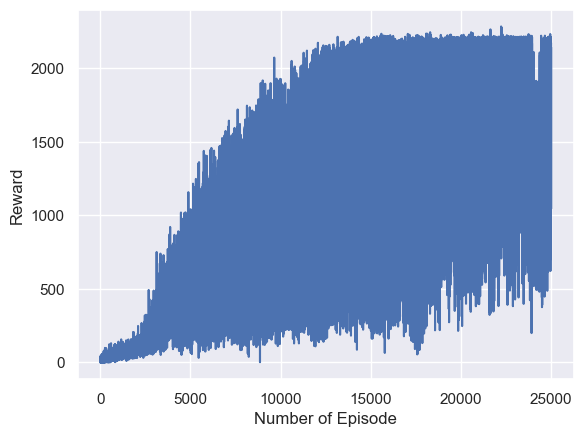

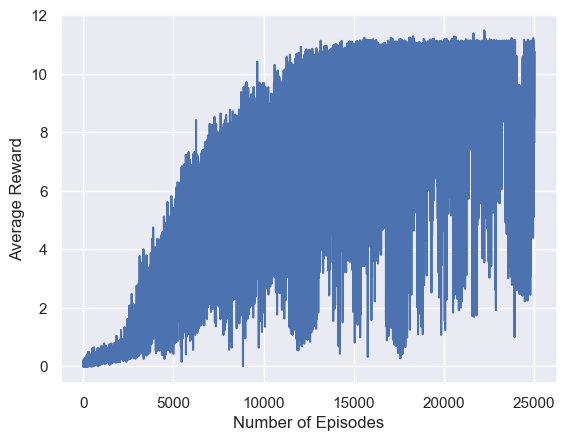

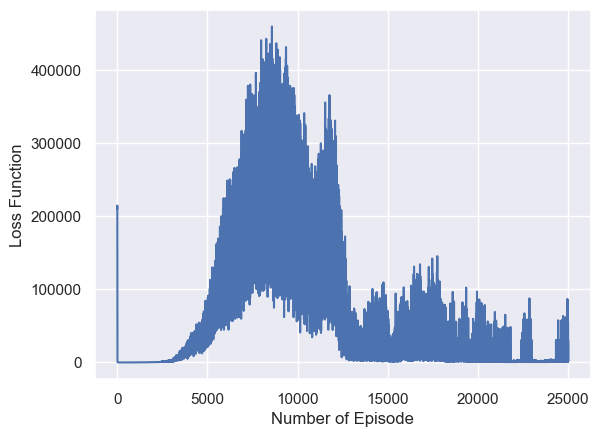

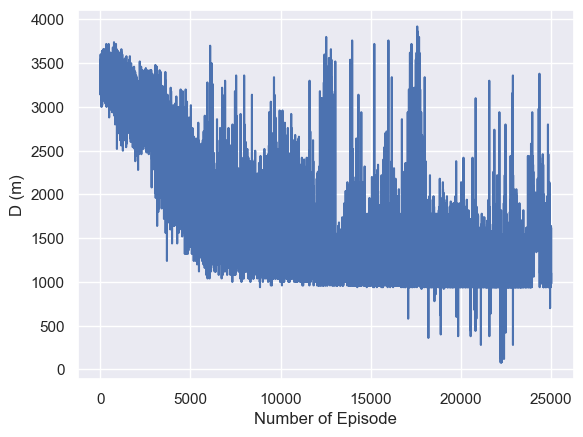

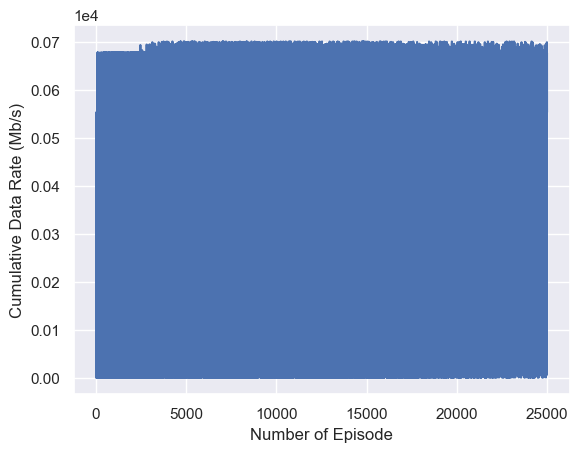

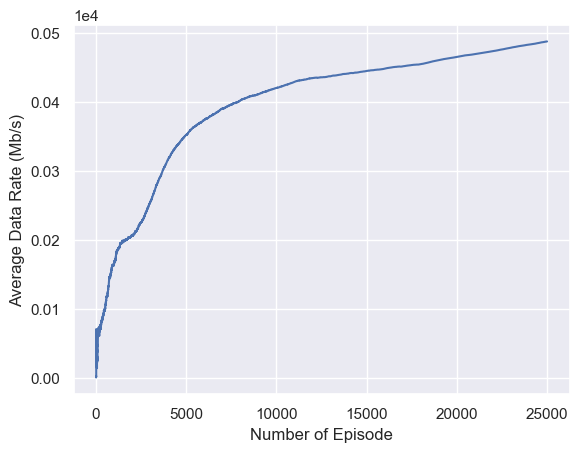

In [4]:
# training the dqn agent
num_episode=25000
step_per_episode=200

# reward
cum_rwd_per_episode=[]
Avg_rwd_per_episode=[]
# loss
losses_per_episode=[]
#energy
#Energy_per_episode=[]
#Avg_energy_training=[]
# data rate
cum_rate_per_episode=[]
Avg_rate_training=[]

Distance=[]
exploration_rate=1
# before it was 1000
#epsilon_decay=3000
epsilon_decay=0.9998
Max_epsilon=1
Min_epsilon=0.01

# saving all location in a array
x_location=[]
y_location=[]
z_location=[]

for i in range (num_episode):
    # reset environment
    state=env.reset()
    #print("state is:" ,state)
    cum_reward=0
    cum_rate=0
    reward_per_action=[]
    #Avg_rate=[]
    losses=0
    done=False
    #epsilon=Max_epsilon
    
    for j in range (step_per_episode-1):
        #print("state is:" ,state)
        
        # action selection
        action=Agent_DQN.choose_action(state,exploration_rate)
        #print("Action is: ",action)
        
        # calculate reward for chosen action
        next_state,reward,done,Data_Rate=env.step(action)
        #print(reward)
        # save transition 
        loss=Agent_DQN.reply_buffer(state,action,reward,next_state,done)
        # sampling for agent training
        #loss=Agent_DQN.sample_buffer()
        if loss is not None:
            losses+=loss
        
        #energy_per_step,sum_energy=env.energy(state,next_state[0:3])
        
        #print("reward,next_state,done,energy: ",reward,next_state,done,energy_per_step)
        #print('========================')
        
        state=next_state
        cum_reward+=reward
        cum_rate=(Data_Rate["Rate"]+Data_Rate["Rate_OMA"])
        reward_per_action.append(reward)
        #Avg_rate.append(Data_Rate["Rate"])
        
        if i==num_episode-1:
            x_location.append(next_state[0])
            y_location.append(next_state[1])
            z_location.append(next_state[2])
         
        if done:
            break

    exploration_rate *= epsilon_decay
    exploration_rate= max(exploration_rate,Min_epsilon)
    #exploration_rate = Min_epsilon + (Max_epsilon - Min_epsilon) *  math.exp(-1. * i / epsilon_decay)
        
    # average reward calculation
    Distance.append(Data_Rate["Distance"])
    
    cum_rwd_per_episode.append(cum_reward)
    Avg_rwd_per_episode.append(np.mean(reward_per_action))
    
    losses_per_episode.append(losses)
    
    
    cum_rate_per_episode.append(cum_rate)
    Avg_rate_training.append(np.mean(cum_rate_per_episode))
    
    #Energy_per_episode.append(sum_energy)
    #Avg_energy_training.append(np.mean(Energy_per_episode))
    

    
    # print the training results
    if (i%2==0):
        print('\rEpisode {} \t Reward: {:.2f},\t Loss: {:.2f}'.
               format(i, cum_rwd_per_episode[i], losses_per_episode[i]))
                                                                                         
        #print('\rEpisode {}\tloss: {:.2f}'.format(i, losses[i]))

    # save parameters of main network 
    if i==num_episode-1:
        # create a file to save weights and bias
        FILE="model_parameters.pth"
        torch.save(Agent_DQN.main_network.state_dict(),FILE)

# reward visualization
fig1 = plt.figure()
sns.set()
plt.plot(cum_rwd_per_episode)
plt.xlabel('Number of Episode')
plt.ylabel('Reward')

#norm=[]
#for k in reward_per_episode:
#    k=(k-min(reward_per_episode))/(max(reward_per_episode)-min(reward_per_episode))
#    norm.append(k)
#fig2 = plt.figure()
#sns.set()
#plt.plot(norm)
#plt.xlabel('Number of Episode')
#plt.ylabel('Normalized Reward')

fig2 = plt.figure()
sns.set()
plt.plot(Avg_rwd_per_episode)
plt.xlabel('Number of Episodes')
plt.ylabel('Average Reward')


# loss visualization
# convert loss values which are tensor values to a list of numpy array
losses_per_episode=[k.detach().numpy() for k in losses_per_episode if k is not None]
fig3=plt.figure()
sns.set()
plt.plot(losses_per_episode)
plt.xlabel('Number of Episode')
plt.ylabel('Loss Function')

fig4=plt.figure()
sns.set()
plt.plot(Distance)
plt.xlabel('Number of Episode')
plt.ylabel('D (m)')



# energy usage visualization
#fig3 = plt.figure()
#sns.set()
#plt.plot(Energy_per_episode)
#plt.xlabel('Number of Episode')
#plt.ylabel('Energy Usage (kJ)')

#fig5 = plt.figure()
#sns.set()
#plt.plot(Avg_energy_training)
#plt.xlabel('Number of Episode')
#plt.ylabel('Average Energy Usage (kJ) ')

# Data rate
fig5 = plt.figure()
sns.set()
plt.plot(cum_rate_per_episode)
plt.xlabel('Number of Episode')
plt.ylabel('Cumulative Data Rate (Mb/s)')
plt.ticklabel_format(axis='y', style='sci', scilimits=(4,4))

fig6 = plt.figure()
sns.set()
plt.plot(Avg_rate_training)
plt.xlabel('Number of Episode')
plt.ylabel('Average Data Rate (Mb/s)')
plt.ticklabel_format(axis='y', style='sci', scilimits=(4,4))


plt.show()

[220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 220, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 220, 200, 200, 200, 200, 200, 220, 220, 220, 220, 220, 220, 220,

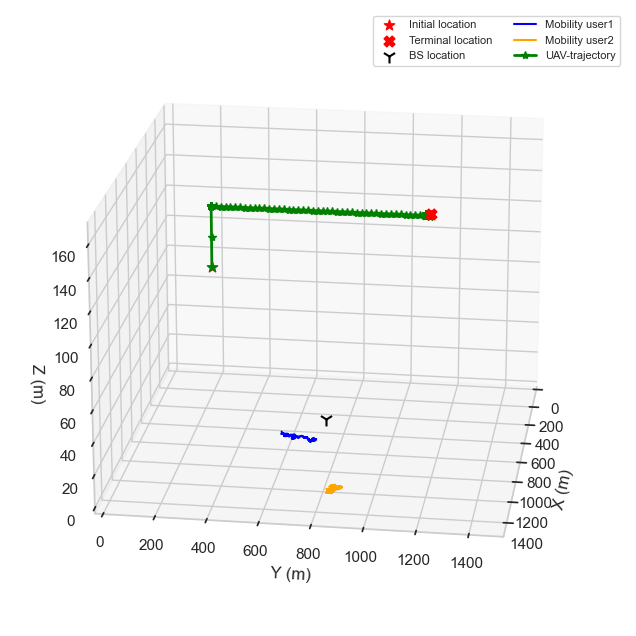

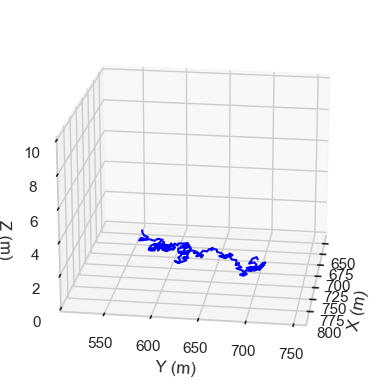

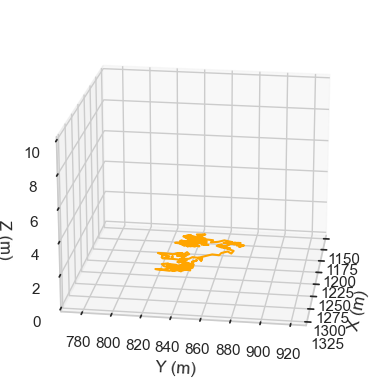

In [5]:
sns.set_style("whitegrid")
env.path_plot(x_location,y_location,z_location)
print(x_location)
print(y_location)
print(z_location)


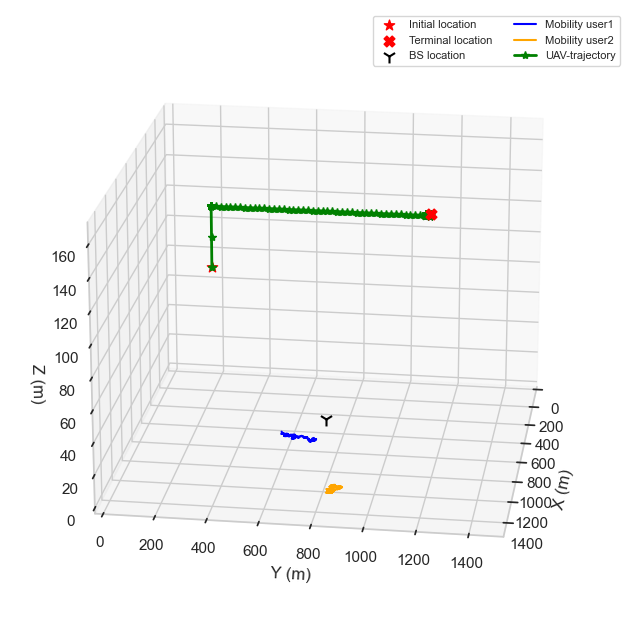

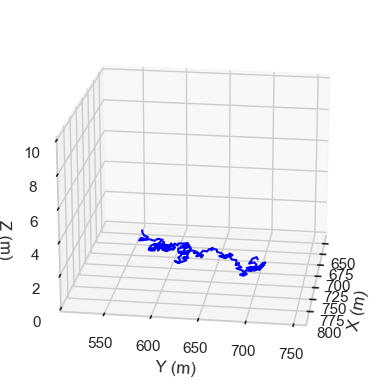

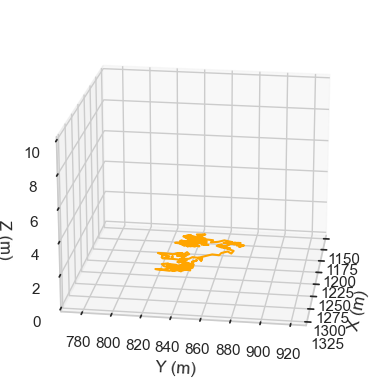

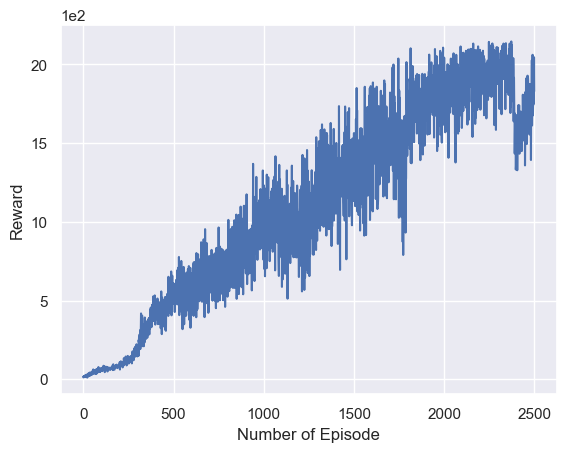

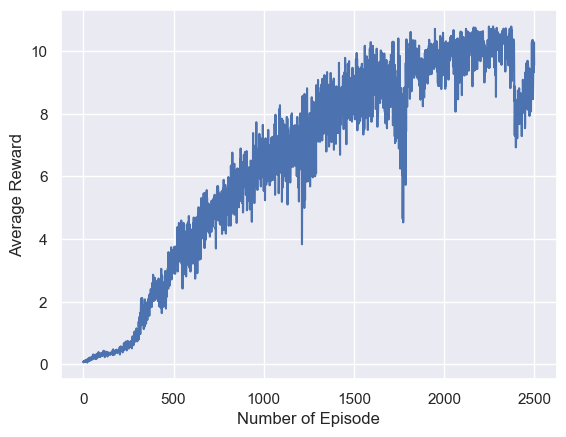

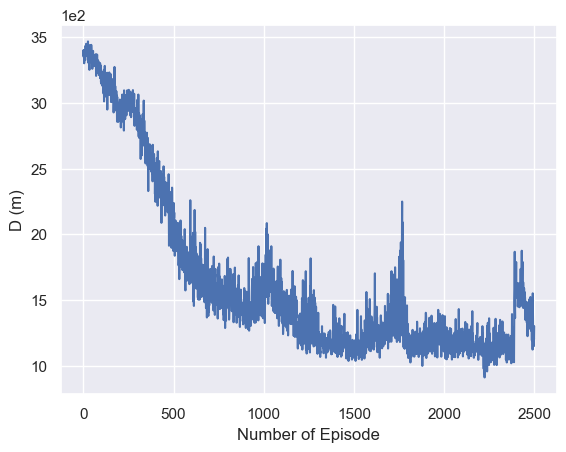

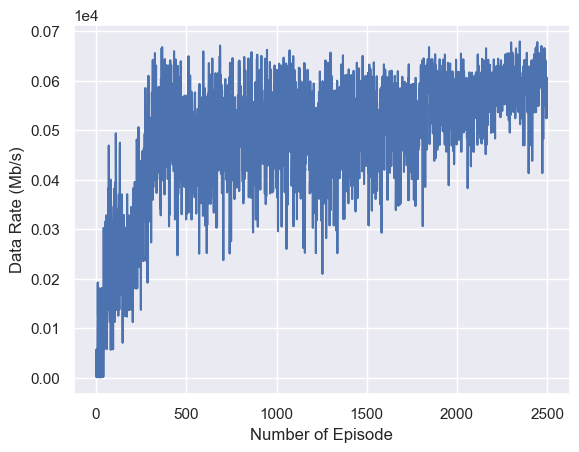

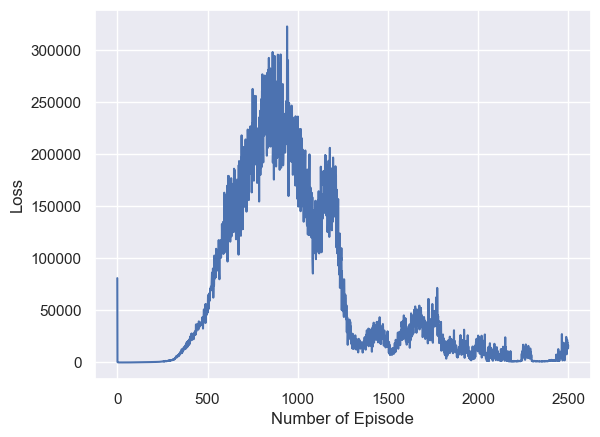

In [6]:
# uav trajectory for last episode
# the reason why uav is jumped to the terminal state is that I appened the destination to the 3 arrays, fix it!
#print(x_location)
#print(y_location)
#print(z_location)
from numpy import savetxt
#savetxt('Average_reward_003.csv', Avg_reward, delimiter=',')
savetxt('rwd_per_episode_T1.csv', cum_rwd_per_episode, delimiter=',')
savetxt('Avg_rwd_per_episode_T1.csv', Avg_rwd_per_episode, delimiter=',')
savetxt('loss_T1.csv', losses_per_episode, delimiter=',')
#savetxt('Energy_per_episode_P.csv', Energy_per_episode, delimiter=',')
#savetxt('Avg_energy_training_P.csv', Avg_energy_training, delimiter=',')
savetxt('cum_rate_per_episode_T1.csv', cum_rate_per_episode, delimiter=',')
savetxt('Distance_T1.csv', Distance, delimiter=',')
sns.set_style("whitegrid")
env.path_plot(x_location,y_location,z_location)

New_rwd_per_episode=[]
for r in range(len(cum_rwd_per_episode)):
        if  r==len(cum_rwd_per_episode)-1:
            samples=np.mean(cum_rwd_per_episode[r-9:])
            #print(samples)
            New_rwd_per_episode.append(samples)
        elif r%10==0 and r!=0:
            samples=np.mean(cum_rwd_per_episode[r-10:r])
            #print(samples)
            New_rwd_per_episode.append(samples)

fig1= plt.figure()
sns.set()
plt.plot(New_rwd_per_episode)
plt.xlabel('Number of Episode')
plt.ylabel('Reward')
plt.ticklabel_format(axis='y', style='sci', scilimits=(2,2))



New_Avg_rwd_per_episode=[]
for a in range(len(Avg_rwd_per_episode)):
        if  a==len(Avg_rwd_per_episode)-1:
            samples=np.mean(Avg_rwd_per_episode[a-9:])
            #print(samples)
            New_Avg_rwd_per_episode.append(samples)
        elif a%10==0 and a!=0:
            samples=np.mean(Avg_rwd_per_episode[a-10:a])
            #print(samples)
            New_Avg_rwd_per_episode.append(samples)

fig2= plt.figure()
sns.set()
plt.plot(New_Avg_rwd_per_episode)
plt.xlabel('Number of Episode')
plt.ylabel('Average Reward')


New_Distance=[]
for d in range(len(Distance)):
        if  d==len(Distance)-1:
            samples=np.mean(Distance[d-9:])
            #print(samples)
            New_Distance.append(samples)
        elif d%10==0 and d!=0:
            samples=np.mean(Distance[d-10:d])
            #print(samples)
            New_Distance.append(samples)

fig3= plt.figure()
sns.set()
plt.plot(New_Distance)
plt.xlabel('Number of Episode')
plt.ylabel('D (m)')
plt.ticklabel_format(axis='y', style='sci', scilimits=(2,2))

New_cum_rate_per_episode=[]
for b in range(len(cum_rate_per_episode)):
        if  b==len(cum_rate_per_episode)-1:
            samples=np.mean(cum_rate_per_episode[b-9:])
            #print(samples)
            New_cum_rate_per_episode.append(samples)
        elif b%10==0 and b!=0:
            samples=np.mean(cum_rate_per_episode[b-10:b])
            #print(samples)
            New_cum_rate_per_episode.append(samples)

fig4= plt.figure()
sns.set()
plt.plot(New_cum_rate_per_episode)
plt.xlabel('Number of Episode')
plt.ylabel('Data Rate (Mb/s)')
plt.ticklabel_format(axis='y', style='sci', scilimits=(4,4))

New_loss=[]
for b in range(len(losses_per_episode)):
        if  b==len(losses_per_episode)-1:
            samples=np.mean(losses_per_episode[b-9:])
            #print(samples)
            New_loss.append(samples)
        elif b%10==0 and b!=0:
            samples=np.mean(losses_per_episode[b-10:b])
            #print(samples)
            New_loss.append(samples)

fig5= plt.figure()
sns.set()
plt.plot(New_loss)
plt.xlabel('Number of Episode')
plt.ylabel('Loss')
#plt.ticklabel_format(axis='y', style='sci', scilimits=(4,4))


from numpy import savetxt
#savetxt('Average_reward_003.csv', Avg_reward, delimiter=',')
savetxt('New_rwd_per_episode_T1.csv', New_rwd_per_episode, delimiter=',')
savetxt('New_Avg_rwd_per_episode_T1.csv', New_Avg_rwd_per_episode, delimiter=',')
savetxt('New_loss_T1.csv', New_loss, delimiter=',')
#savetxt('Energy_per_episode_P.csv', Energy_per_episode, delimiter=',')
#savetxt('Avg_energy_training_P.csv', Avg_energy_training, delimiter=',')
savetxt('New_cum_rate_per_episode_T1.csv', New_cum_rate_per_episode, delimiter=',')
savetxt('New_Distance_T1.csv', New_Distance, delimiter=',')


In [ ]:
New_rwd_per_episode=[]
for r in range(len(cum_rwd_per_episode)):
        if  r==len(cum_rwd_per_episode)-1:
            samples=np.mean(cum_rwd_per_episode[r-9:])
            #print(samples)
            New_rwd_per_episode.append(samples)
        elif r%10==0 and r!=0:
            samples=np.mean(cum_rwd_per_episode[r-10:r])
            #print(samples)
            New_rwd_per_episode.append(samples)

fig1= plt.figure()
sns.set()
plt.plot(New_rwd_per_episode)
plt.xlabel('Number of Episode')
plt.ylabel('Reward')
plt.ticklabel_format(axis='y', style='sci', scilimits=(2,2))



New_Avg_rwd_per_episode=[]
for a in range(len(Avg_rwd_per_episode)):
        if  a==len(Avg_rwd_per_episode)-1:
            samples=np.mean(Avg_rwd_per_episode[a-9:])
            #print(samples)
            New_Avg_rwd_per_episode.append(samples)
        elif a%10==0 and a!=0:
            samples=np.mean(Avg_rwd_per_episode[a-10:a])
            #print(samples)
            New_Avg_rwd_per_episode.append(samples)

fig2= plt.figure()
sns.set()
plt.plot(New_Avg_rwd_per_episode)
plt.xlabel('Number of Episode')
plt.ylabel('Average Reward')


New_Distance=[]
for d in range(len(Distance)):
        if  d==len(Distance)-1:
            samples=np.mean(Distance[d-9:])
            #print(samples)
            New_Distance.append(samples)
        elif d%10==0 and d!=0:
            samples=np.mean(Distance[d-10:d])
            #print(samples)
            New_Distance.append(samples)

fig3= plt.figure()
sns.set()
plt.plot(New_Distance)
plt.xlabel('Number of Episode')
plt.ylabel('D (m)')
plt.ticklabel_format(axis='y', style='sci', scilimits=(2,2))

New_cum_rate_per_episode=[]
for b in range(len(cum_rate_per_episode)):
        if  b==len(cum_rate_per_episode)-1:
            samples=np.mean(cum_rate_per_episode[b-9:])
            #print(samples)
            New_cum_rate_per_episode.append(samples)
        elif b%10==0 and b!=0:
            samples=np.mean(cum_rate_per_episode[b-10:b])
            #print(samples)
            New_cum_rate_per_episode.append(samples)

fig4= plt.figure()
sns.set()
plt.plot(New_cum_rate_per_episode)
plt.xlabel('Number of Episode')
plt.ylabel('Data Rate (Mb/s)')
plt.ticklabel_format(axis='y', style='sci', scilimits=(4,4))

New_loss=[]
for b in range(len(losses_per_episode)):
        if  b==len(losses_per_episode)-1:
            samples=np.mean(losses_per_episode[b-9:])
            #print(samples)
            New_loss.append(samples)
        elif b%10==0 and b!=0:
            samples=np.mean(losses_per_episode[b-10:b])
            #print(samples)
            New_loss.append(samples)

fig5= plt.figure()
sns.set()
plt.plot(New_loss)
plt.xlabel('Number of Episode')
plt.ylabel('Loss')
#plt.ticklabel_format(axis='y', style='sci', scilimits=(4,4))


from numpy import savetxt
#savetxt('Average_reward_003.csv', Avg_reward, delimiter=',')
savetxt('New_rwd_per_episode_T1.csv', New_rwd_per_episode, delimiter=',')
savetxt('New_Avg_rwd_per_episode_T1.csv', New_Avg_rwd_per_episode, delimiter=',')
savetxt('New_loss_T1.csv', New_loss, delimiter=',')
#savetxt('Energy_per_episode_P.csv', Energy_per_episode, delimiter=',')
#savetxt('Avg_energy_training_P.csv', Avg_energy_training, delimiter=',')
savetxt('New_cum_rate_per_episode_T1.csv', New_cum_rate_per_episode, delimiter=',')
savetxt('New_Distance_T1.csv', New_Distance, delimiter=',')


In [ ]:
# need modification
# saving results for plotting: lr=0.003
#from numpy import savetxt
#savetxt('Average_reward_003.csv', Avg_reward, delimiter=',')
#savetxt('cum_rwd_per_episode_P.csv', cum_rwd_per_episode, delimiter=',')
#savetxt('Avg_rwd_per_episode_P.csv', Avg_rwd_per_episode, delimiter=',')
#savetxt('losses_per_episode_P.csv', losses_per_episode, delimiter=',')
#savetxt('Energy_per_episode_P.csv', Energy_per_episode, delimiter=',')
#savetxt('Avg_energy_training_P.csv', Avg_energy_training, delimiter=',')
#savetxt('cum_rate_per_episode_P.csv', cum_rate_per_episode, delimiter=',')
#savetxt('Avg_rate_training_P.csv', Avg_rate_training, delimiter=',')

In [ ]:
# load parameters of saved dqn
#Agent_DQN.main_network.load_state_dict(torch.load(FILE))